In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Dataset/Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns = [x.strip() for x in df.columns]

In [6]:
df2 = df.get(["Country", "Year","GDP", "Life expectancy", "BMI", "Schooling", "Alcohol", "Population"])
df2.head()

,Country,Year,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
0,Afghanistan,2015,584.259210,65.0,19.1,10.1,0.01,33736494.0
1,Afghanistan,2014,612.696514,59.9,18.6,10.0,0.01,327582.0
2,Afghanistan,2013,631.744976,59.9,18.1,9.9,0.01,31731688.0
3,Afghanistan,2012,669.959000,59.5,17.6,9.8,0.01,3696958.0
4,Afghanistan,2011,63.537231,59.2,17.2,9.5,0.01,2978599.0


In [7]:
df2.isnull().sum()

Country              0
Year                 0
GDP                448
Life expectancy     10
BMI                 34
Schooling          163
Alcohol            194
Population         652
dtype: int64

In [8]:
df2 = df2.fillna(method="ffill")

In [9]:
df2.isnull().sum()

Country            0
Year               0
GDP                0
Life expectancy    0
BMI                0
Schooling          0
Alcohol            0
Population         0
dtype: int64

In [10]:
print(df2["Country"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [11]:
df2.describe()

,Year,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03
mean,2007.518720,7475.593613,69.195643,38.020150,11.935671,4.607270,1.316870e+07
std,4.613841,13728.461983,9.536654,20.175077,3.340202,4.044785,5.629984e+07
min,2000.000000,1.681350,36.300000,1.000000,0.000000,0.010000,3.400000e+01
25%,2004.000000,456.766527,63.025000,19.000000,10.100000,0.880000,1.364255e+05
50%,2008.000000,1680.834893,72.000000,43.000000,12.300000,3.765000,1.289898e+06
75%,2012.000000,6454.061607,75.600000,56.100000,14.100000,7.665000,7.394106e+06
max,2015.000000,119172.741800,89.000000,87.300000,20.700000,17.870000,1.293859e+09


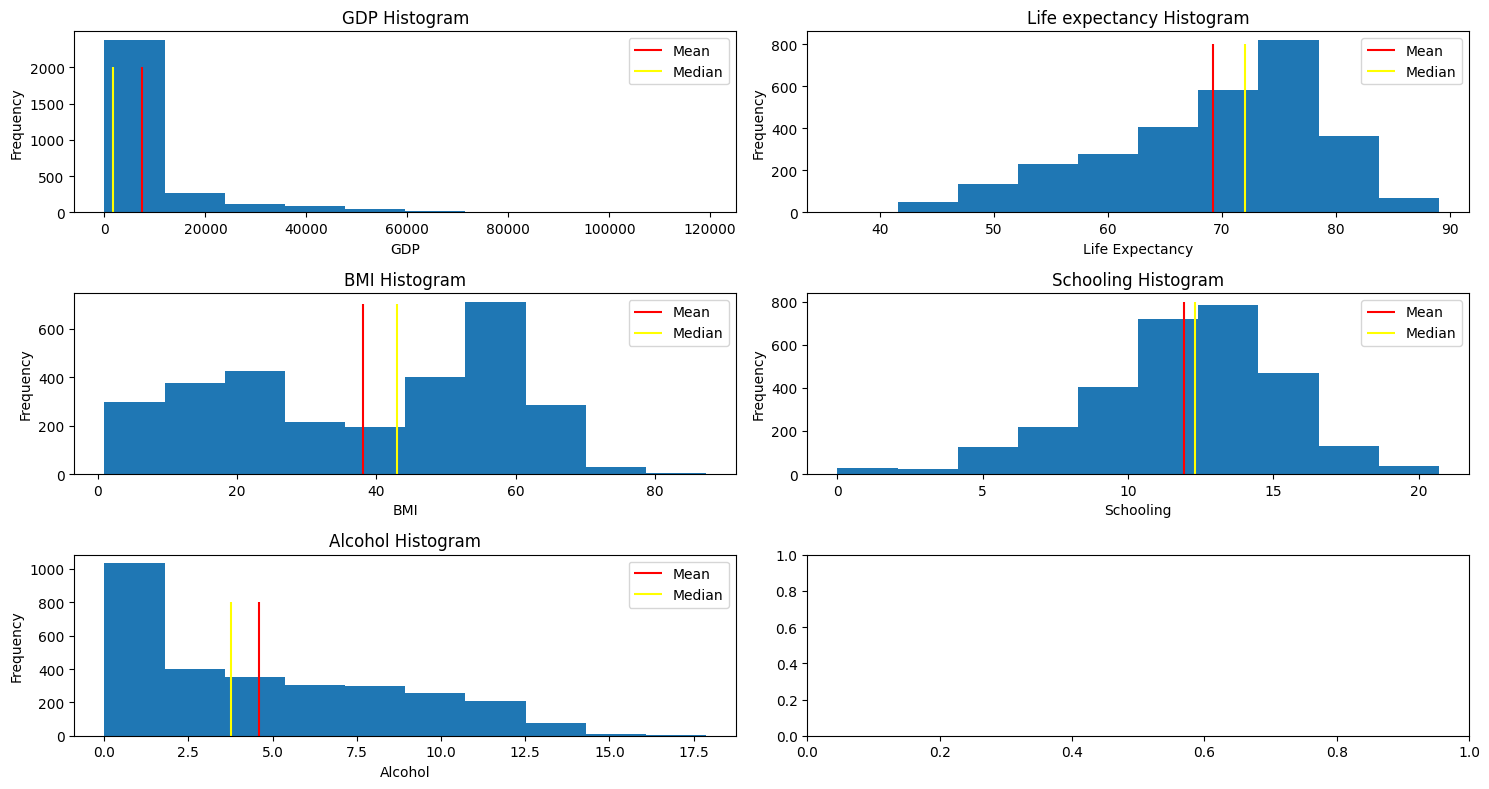

In [12]:
fig, axeses = plt.subplots(figsize=(15,8), ncols = 2, nrows=3, tight_layout=True)
((axes1, axes2), (axes3, axes4), (axes5, axes6)) = axeses

axes1.hist(df2.GDP)
axes1.set_title("GDP Histogram")
axes1.set_xlabel("GDP")
axes1.set_ylabel("Frequency")
axes1.vlines(df2.GDP.mean(), 0, 2000, label="Mean", color="red")
axes1.vlines(df2.GDP.median(), 0, 2000, label="Median", color="yellow")
axes1.legend()

axes2.hist(df2["Life expectancy"])
axes2.set_title("Life expectancy Histogram")
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("Frequency")
axes2.vlines(df2["Life expectancy"].mean(), 0, 800, label="Mean", color="red")
axes2.vlines(df2["Life expectancy"].median(), 0, 800, label="Median", color="yellow")
axes2.legend()

axes3.hist(df2.BMI)
axes3.set_title("BMI Histogram")
axes3.set_xlabel("BMI")
axes3.set_ylabel("Frequency")
axes3.vlines(df2.BMI.mean(), 0, 700, label="Mean", color="red")
axes3.vlines(df2.BMI.median(), 0, 700, label="Median", color="yellow")
axes3.legend()

axes4.hist(df2.Schooling)
axes4.set_title("Schooling Histogram")
axes4.set_xlabel("Schooling")
axes4.set_ylabel("Frequency")
axes4.vlines(df2.Schooling.mean(), 0, 800, label="Mean", color="red")
axes4.vlines(df2.Schooling.median(), 0, 800, label="Median", color="yellow")
axes4.legend()

axes5.hist(df2.Alcohol)
axes5.set_title("Alcohol Histogram")
axes5.set_xlabel("Alcohol")
axes5.set_ylabel("Frequency")
axes5.vlines(df2.Alcohol.mean(), 0, 800, label="Mean", color="red")
axes5.vlines(df2.Alcohol.median(), 0, 800, label="Median", color="yellow")
axes5.legend()

**GDP Histogram**

Most of the country GDP is the lower than 20000 \
Average gdp is 10000 \
This histogram descibe that this is right screwed histogram.

**Life Expectancy**

Average life expectancy of all country between 68 to 75 years \
Few country having life expectancy greater than 80 \
Some country having life expectancy less than 50 ... What is the reason for low life exp. \
This is left screwed histogram.

**Schooling**

Average schooling of a country is between 10 to 15 and that's good to any country \
But in this data some countries having 20 or some countrie having between 0 to 5.. 
Soo what is the reason for high and low schooling in some country

**Alcohol**

This is right screwed histogram

#### Filtering country life expectancy which having between 40 to 50 Years and 80 to 90 Years.

In [13]:
low_life_exp = df2[(df2["Life expectancy"] > 40) & (df2["Life expectancy"] < 50)]
high_life_exp = df2[(df2["Life expectancy"] > 80) & (df2["Life expectancy"] < 90)]

In [14]:
low_life_exp.describe()

,Year,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,2004.106557,714.958118,47.090984,19.184426,7.992623,3.637377,9.365009e+06
std,3.449296,1011.660787,1.928945,8.722556,2.493534,2.716766,2.431974e+07
min,2000.000000,21.569654,41.000000,2.200000,0.000000,0.010000,1.679000e+03
25%,2001.000000,156.502562,45.700000,15.725000,5.900000,1.520000,1.832845e+05
50%,2003.500000,349.736672,47.600000,18.100000,8.400000,3.090000,1.767444e+06
75%,2006.000000,627.086495,48.500000,24.625000,9.800000,5.070000,8.000530e+06
max,2014.000000,4896.583835,49.900000,77.300000,13.400000,10.570000,1.389395e+08


In [15]:
high_life_exp.describe()

,Year,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
count,253.000000,253.000000,253.000000,253.000000,253.00000,253.000000,2.530000e+02
mean,2010.335968,28836.180793,83.084585,50.793676,16.26917,8.101265,9.971289e+06
std,3.595877,24726.309767,2.281386,19.553708,1.83173,3.237424,1.662343e+07
min,2000.000000,46.217000,81.000000,3.000000,11.80000,0.010000,6.890000e+02
25%,2008.000000,4461.892510,81.400000,53.700000,15.30000,6.950000,2.599530e+05
50%,2011.000000,29986.291500,82.100000,59.000000,16.00000,8.680000,4.564297e+06
75%,2013.000000,46586.652500,84.000000,62.900000,17.30000,10.370000,8.633169e+06
max,2015.000000,119172.741800,89.000000,69.600000,20.70000,14.070000,8.168661e+07


In [16]:
print("Low Life Ex Country", low_life_exp["Country"].unique())

print("High Life Ex Country",high_life_exp["Country"].unique())

Low Life Ex Country ['Angola' 'Botswana' "Côte d'Ivoire" 'Central African Republic' 'Chad'
 'Eritrea' 'Lesotho' 'Malawi' 'Mali' 'Mozambique' 'Nigeria' 'Niue'
 'Rwanda' 'Saint Kitts and Nevis' 'Sierra Leone' 'South Sudan' 'Swaziland'
 'Uganda' 'United Republic of Tanzania' 'Zambia' 'Zimbabwe']
High Life Ex Country ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Portugal' 'Republic of Korea' 'Singapore' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom of Great Britain and Northern Ireland']


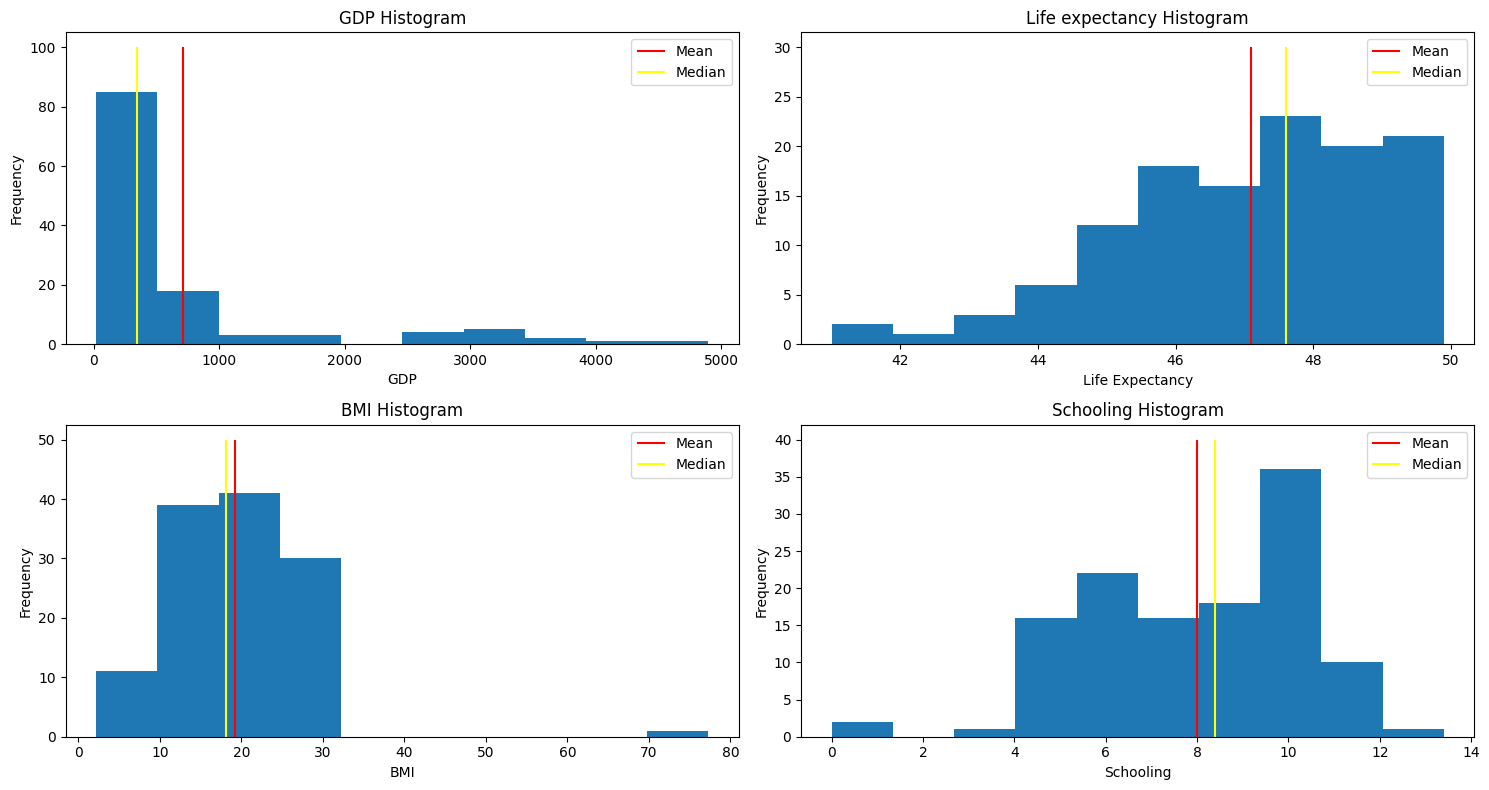

In [17]:
fig, axeses = plt.subplots(figsize=(15,8), ncols = 2, nrows=2, tight_layout=True)
((axes1, axes2), (axes3, axes4)) = axeses

axes1.hist(low_life_exp.GDP)
axes1.set_title("GDP Histogram")
axes1.set_xlabel("GDP")
axes1.set_ylabel("Frequency")
axes1.vlines(low_life_exp.GDP.mean(), 0, 100, label="Mean", color="red")
axes1.vlines(low_life_exp.GDP.median(), 0, 100, label="Median", color="yellow")
axes1.legend()

axes2.hist(low_life_exp["Life expectancy"])
axes2.set_title("Life expectancy Histogram")
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("Frequency")
axes2.vlines(low_life_exp["Life expectancy"].mean(), 0, 30, label="Mean", color="red")
axes2.vlines(low_life_exp["Life expectancy"].median(), 0, 30, label="Median", color="yellow")
axes2.legend()

axes3.hist(low_life_exp.BMI)
axes3.set_title("BMI Histogram")
axes3.set_xlabel("BMI")
axes3.set_ylabel("Frequency")
axes3.vlines(low_life_exp.BMI.mean(), 0, 50, label="Mean", color="red")
axes3.vlines(low_life_exp.BMI.median(), 0, 50, label="Median", color="yellow")
axes3.legend()

axes4.hist(low_life_exp.Schooling)
axes4.set_title("Schooling Histogram")
axes4.set_xlabel("Schooling")
axes4.set_ylabel("Frequency")
axes4.vlines(low_life_exp.Schooling.mean(), 0, 40, label="Mean", color="red")
axes4.vlines(low_life_exp.Schooling.median(), 0, 40, label="Median", color="yellow")
axes4.legend()


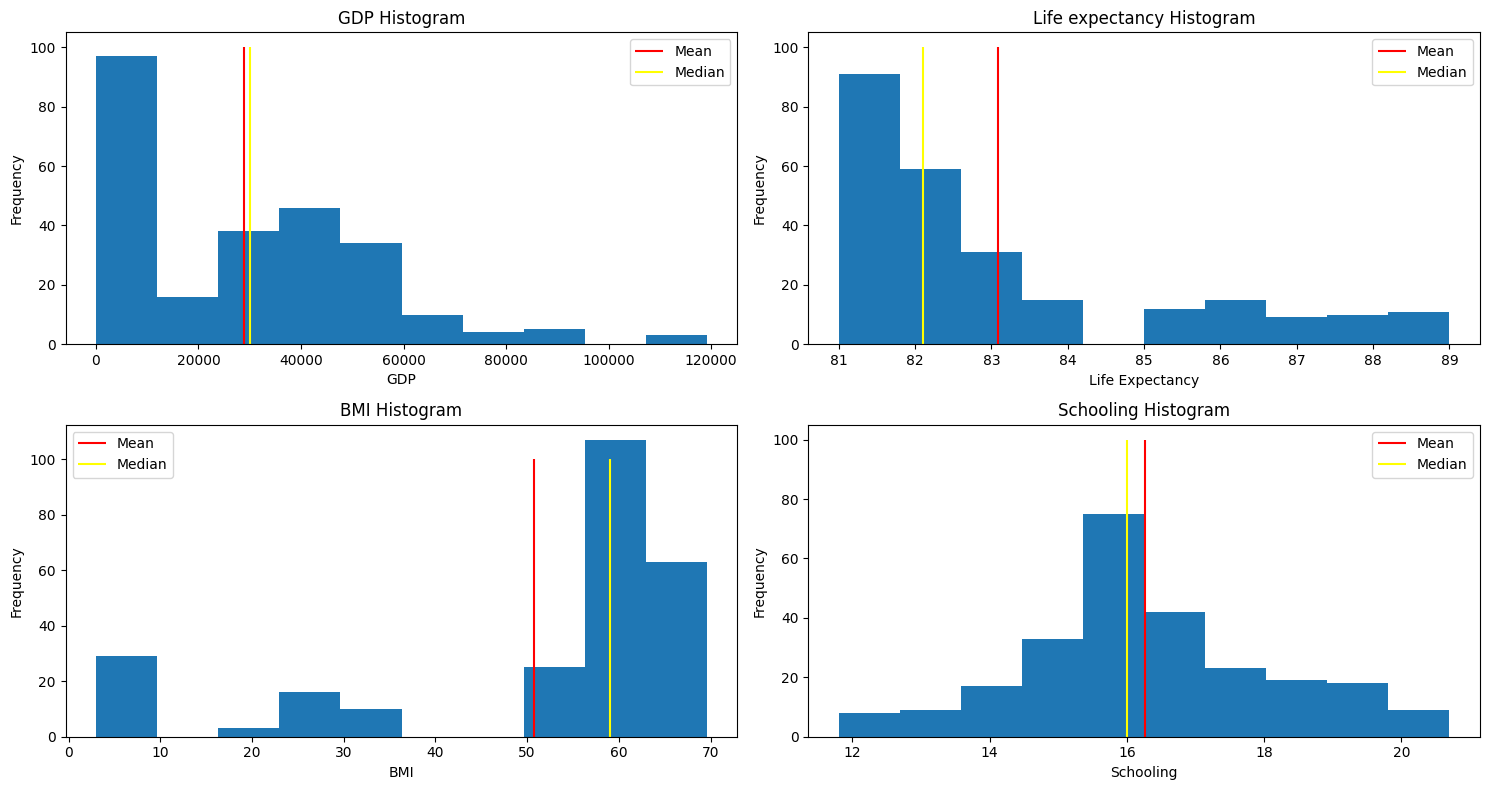

In [18]:
fig, axeses = plt.subplots(figsize=(15,8), ncols = 2, nrows=2, tight_layout=True)
((axes1, axes2), (axes3, axes4)) = axeses

axes1.hist(high_life_exp.GDP)
axes1.set_title("GDP Histogram")
axes1.set_xlabel("GDP")
axes1.set_ylabel("Frequency")
axes1.vlines(high_life_exp.GDP.mean(), 0, 100, label="Mean", color="red")
axes1.vlines(high_life_exp.GDP.median(), 0, 100, label="Median", color="yellow")
axes1.legend()

axes2.hist(high_life_exp["Life expectancy"])
axes2.set_title("Life expectancy Histogram")
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("Frequency")
axes2.vlines(high_life_exp["Life expectancy"].mean(), 0, 100, label="Mean", color="red")
axes2.vlines(high_life_exp["Life expectancy"].median(), 0, 100, label="Median", color="yellow")
axes2.legend()

axes3.hist(high_life_exp.BMI)
axes3.set_title("BMI Histogram")
axes3.set_xlabel("BMI")
axes3.set_ylabel("Frequency")
axes3.vlines(high_life_exp.BMI.mean(), 0, 100, label="Mean", color="red")
axes3.vlines(high_life_exp.BMI.median(), 0, 100, label="Median", color="yellow")
axes3.legend()

axes4.hist(high_life_exp.Schooling)
axes4.set_title("Schooling Histogram")
axes4.set_xlabel("Schooling")
axes4.set_ylabel("Frequency")
axes4.vlines(high_life_exp.Schooling.mean(), 0, 100, label="Mean", color="red")
axes4.vlines(high_life_exp.Schooling.median(), 0, 100, label="Median", color="yellow")
axes4.legend()

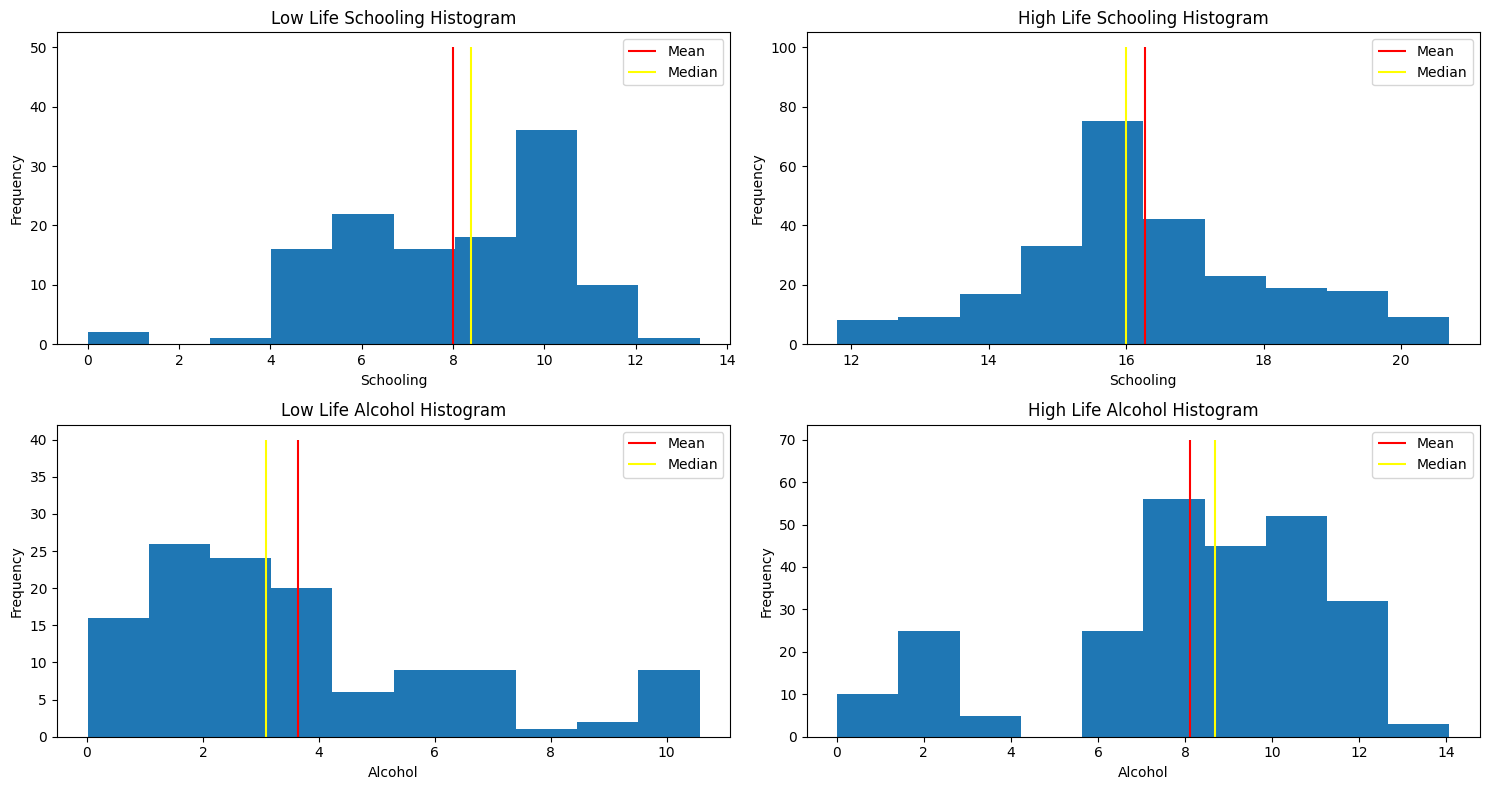

In [19]:
fig, axeses = plt.subplots(figsize=(15,8), ncols = 2, nrows=2, tight_layout=True)
((axes1, axes2), (axes3, axes4)) = axeses

axes1.hist(low_life_exp.Schooling)
axes1.set_title("Low Life Schooling Histogram")
axes1.set_xlabel("Schooling")
axes1.set_ylabel("Frequency")
axes1.vlines(low_life_exp.Schooling.mean(), 0, 50, label="Mean", color="red")
axes1.vlines(low_life_exp.Schooling.median(), 0, 50, label="Median", color="yellow")
axes1.legend()

axes2.hist(high_life_exp.Schooling)
axes2.set_title("High Life Schooling Histogram")
axes2.set_xlabel("Schooling")
axes2.set_ylabel("Frequency")
axes2.vlines(high_life_exp.Schooling.mean(), 0, 100, label="Mean", color="red")
axes2.vlines(high_life_exp.Schooling.median(), 0, 100, label="Median", color="yellow")
axes2.legend()


axes3.hist(low_life_exp.Alcohol)
axes3.set_title("Low Life Alcohol Histogram")
axes3.set_xlabel("Alcohol")
axes3.set_ylabel("Frequency")
axes3.vlines(low_life_exp.Alcohol.mean(), 0, 40, label="Mean", color="red")
axes3.vlines(low_life_exp.Alcohol.median(), 0, 40, label="Median", color="yellow")
axes3.legend()

axes4.hist(high_life_exp.Alcohol)
axes4.set_title("High Life Alcohol Histogram")
axes4.set_xlabel("Alcohol")
axes4.set_ylabel("Frequency")
axes4.vlines(high_life_exp.Alcohol.mean(), 0, 70, label="Mean", color="red")
axes4.vlines(high_life_exp.Alcohol.median(), 0, 70, label="Median", color="yellow")
axes4.legend()

In [20]:
df2.sort_values("Life expectancy", inplace = True)

Text(0, 0.5, 'Alcohol')

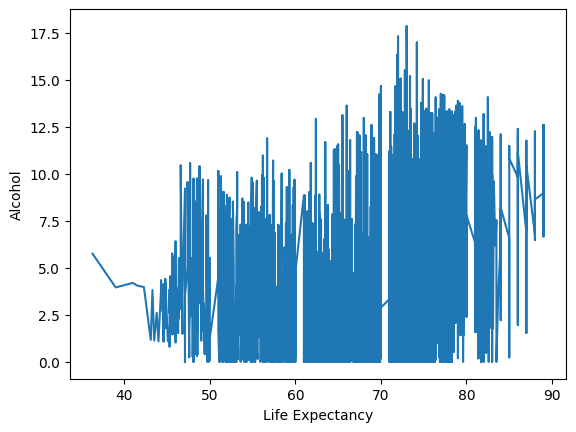

In [21]:
fig, axeses = plt.subplots()
axeses.plot(df2["Life expectancy"], df2["Alcohol"])
axeses.set_xlabel("Life Expectancy")
axeses.set_ylabel("Alcohol")

## On sample

In [22]:
sample_df = df2.sample(frac=0.30)
sample_df.sort_values("Life expectancy", inplace = True)

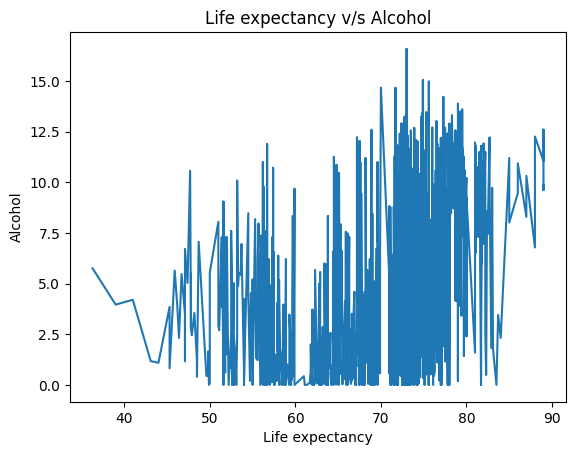

In [23]:
fig, axes = plt.subplots()
axes.plot(sample_df["Life expectancy"], sample_df["Alcohol"])
plt.title("Life expectancy v/s Alcohol")
axes.set_xlabel("Life expectancy")
axes.set_ylabel("Alcohol")
plt.show()

In [24]:
def plt_life(df, xlabel, ylabel):
    fig, axes = plt.subplots()
    axes.plot(df[xlabel], df[ylabel])
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    plt.title(f"{xlabel} v/s {ylabel}")
    plt.show

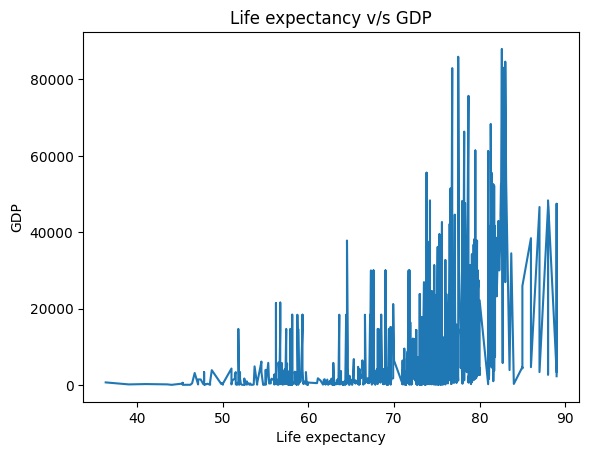

In [25]:
plt_life(sample_df, "Life expectancy", "GDP")

In [26]:
sample_df.head()

,Country,Year,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
1127,Haiti,2010,662.279518,36.3,44.2,8.6,5.76,9999617.0
2312,Sierra Leone,2000,139.314773,39.0,17.2,6.7,3.97,4564297.0
2311,Sierra Leone,2001,227.779471,41.0,17.5,7.0,4.21,4739147.0
1585,Malawi,2000,153.259487,43.1,14.1,10.7,1.18,11376172.0
1584,Malawi,2001,146.761540,43.5,14.4,10.1,1.15,11695863.0


Text(0, 0.5, 'Alcohol')

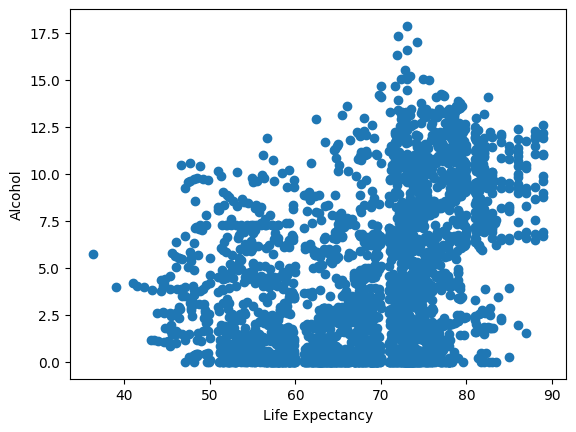

In [27]:
fig, axes = plt.subplots()

axes.scatter(df2["Life expectancy"], df2["Alcohol"])
axes.set_xlabel("Life Expectancy")
axes.set_ylabel("Alcohol")


In [28]:
df2["Alcohol"].corr(df2["Life expectancy"])

0.38072084864816447

In [29]:
df2[df2.columns[2:]].corr()

,GDP,Life expectancy,BMI,Schooling,Alcohol,Population
GDP,1.000000,0.429252,0.259849,0.428728,0.328545,-0.013703
Life expectancy,0.429252,1.000000,0.567361,0.736323,0.380721,0.003051
BMI,0.259849,0.567361,1.000000,0.543982,0.302803,-0.055651
Schooling,0.428728,0.736323,0.543982,1.000000,0.481010,-0.004908
Alcohol,0.328545,0.380721,0.302803,0.481010,1.000000,-0.028925
Population,-0.013703,0.003051,-0.055651,-0.004908,-0.028925,1.000000


In [30]:
def plot_scatter(x,y,x_label,y_label,axes):
    axes.scatter(x,y)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")

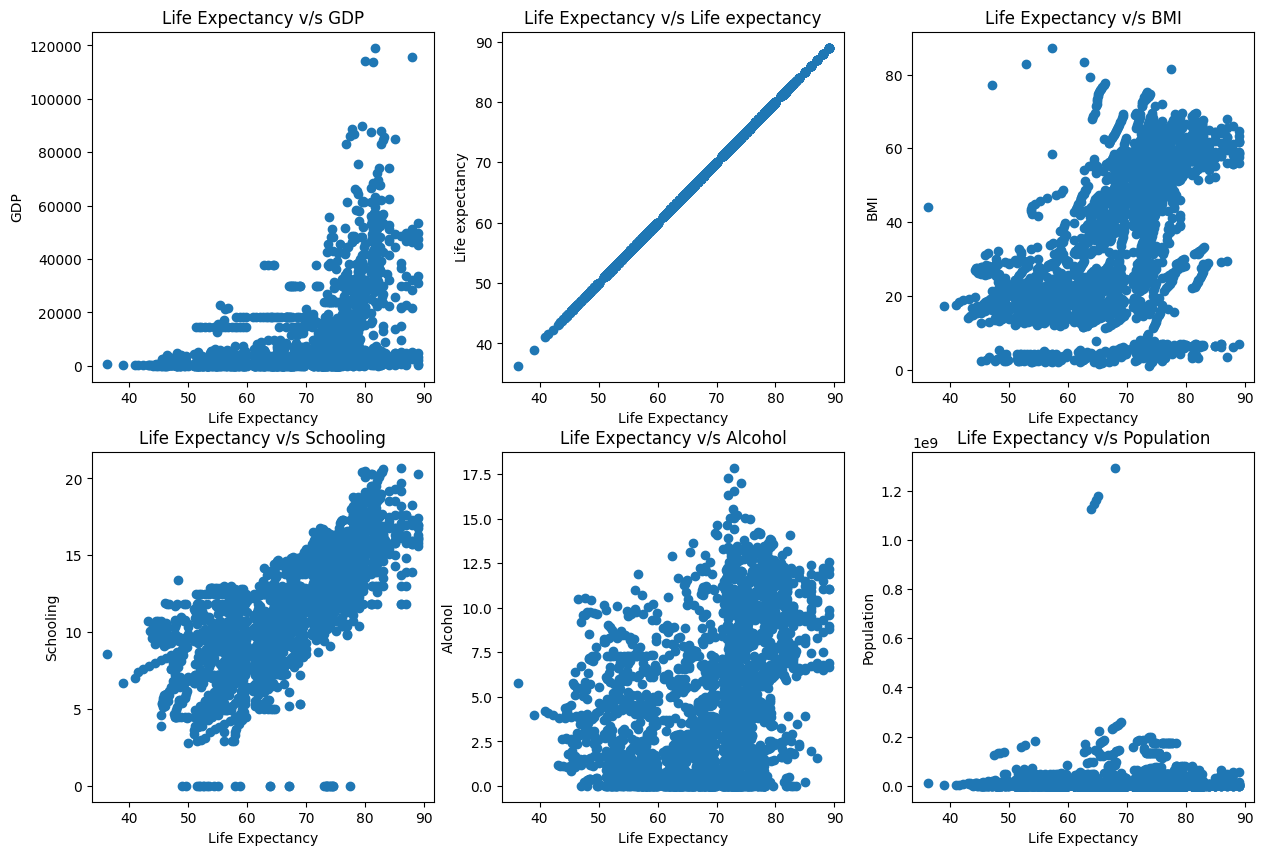

In [31]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=3)

axes = axes.flatten()
columns = df2.columns[2:]

for ax, col in zip(axes, columns):
    plot_scatter(df2["Life expectancy"], df2[col], x_label="Life Expectancy", y_label=col, axes=ax)

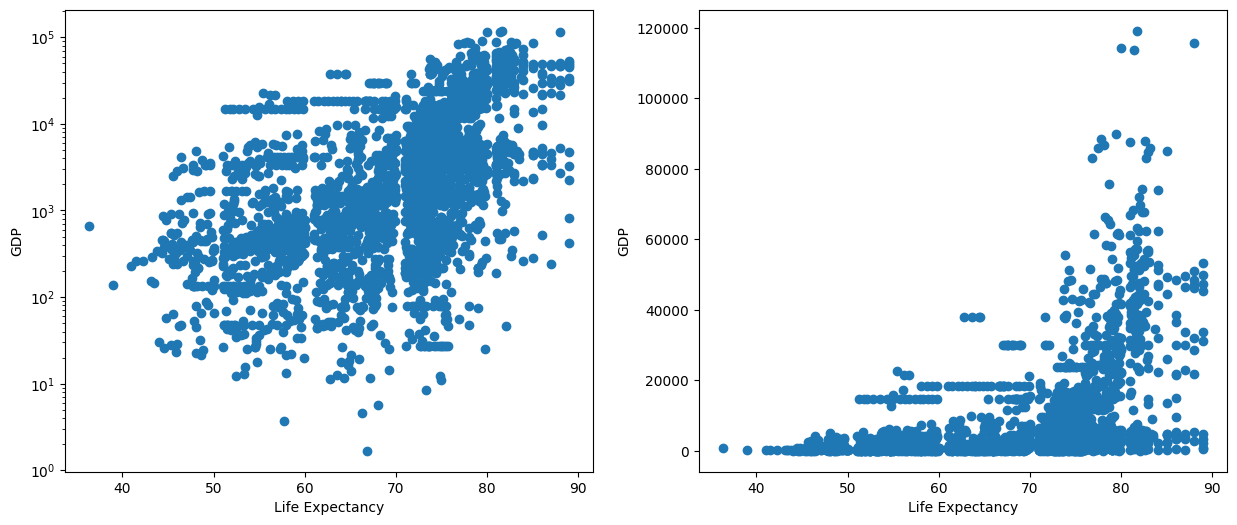

In [32]:
fig, (axes1, axes2) = plt.subplots(ncols=2, figsize=(15, 6))

axes1.scatter(df2["Life expectancy"], df2["GDP"])
axes1.set_xlabel("Life Expectancy")
axes1.set_ylabel("GDP")
axes1.set_yscale('log')

axes2.scatter(df2["Life expectancy"], df2["GDP"])
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("GDP")

plt.show()

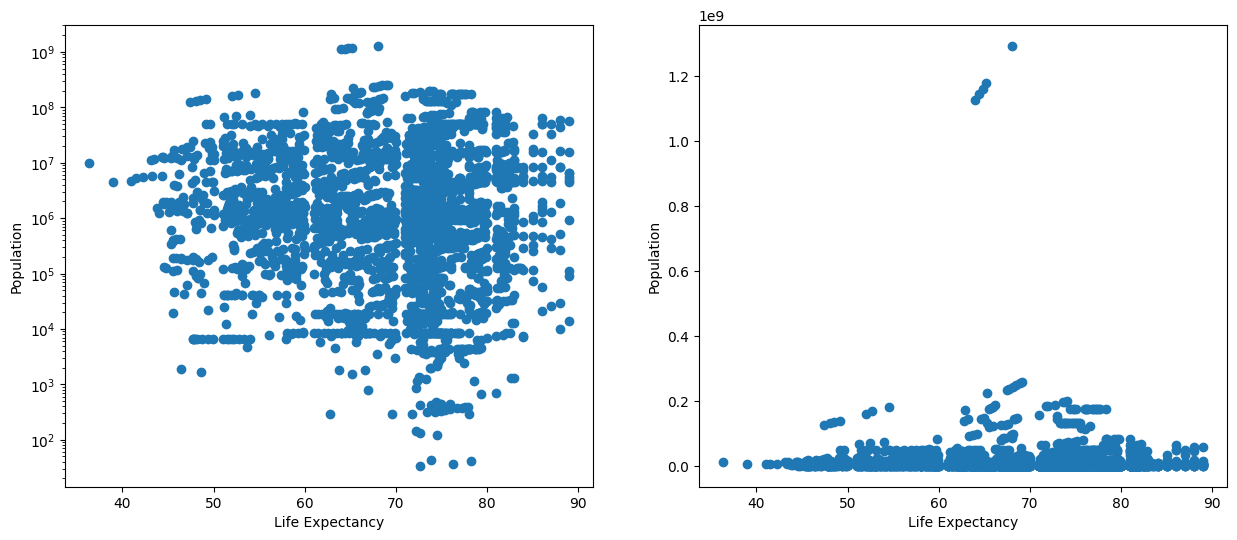

In [33]:
fig, (axes1, axes2) = plt.subplots(ncols=2, figsize=(15, 6))

axes1.scatter(df2["Life expectancy"], df2["Population"])
axes1.set_xlabel("Life Expectancy")
axes1.set_ylabel("Population")
axes1.set_yscale('log')

axes2.scatter(df2["Life expectancy"], df2["Population"])
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("Population")
# axes1.set_yscale('log')


plt.show()

In [34]:
def plot_hist(x,x_label,ax):
    ax.hist(x)
    ax.set_ylabel(f"Frequency of {x_label}")
    ax.set_xlabel(x_label)

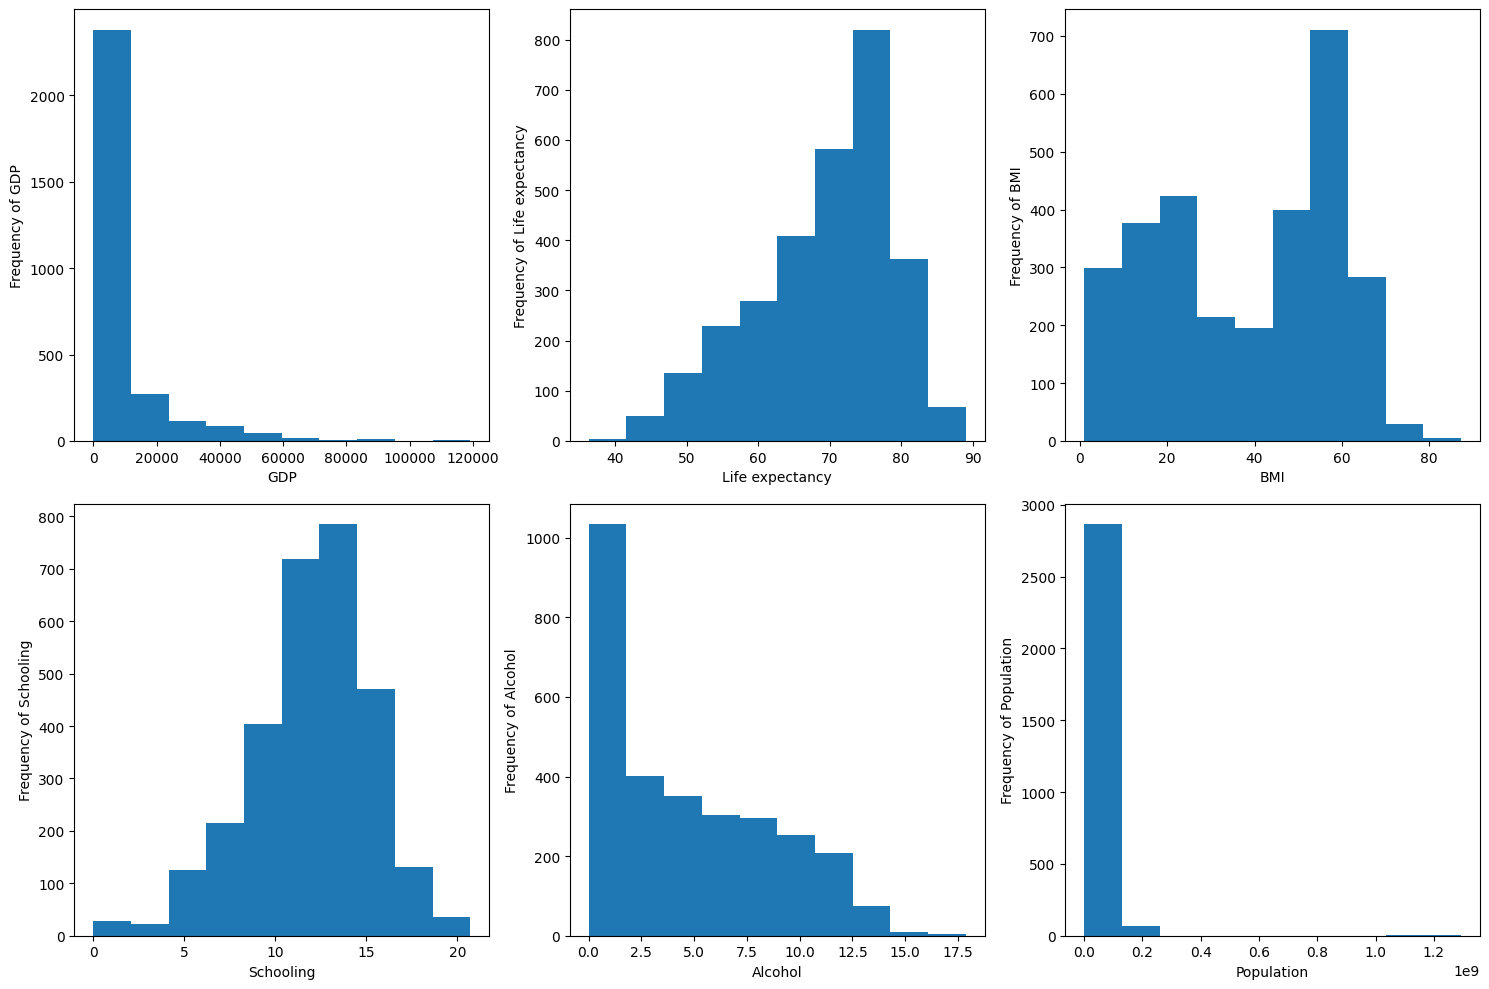

In [35]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=3, tight_layout=True)
axes = axes.flatten()
columns = df2.columns[2:]
for ax,col in zip(axes,columns):
    plot_hist(df2[col],col,ax)

____

##  Outliers

In [36]:
df.dropna(inplace=True)

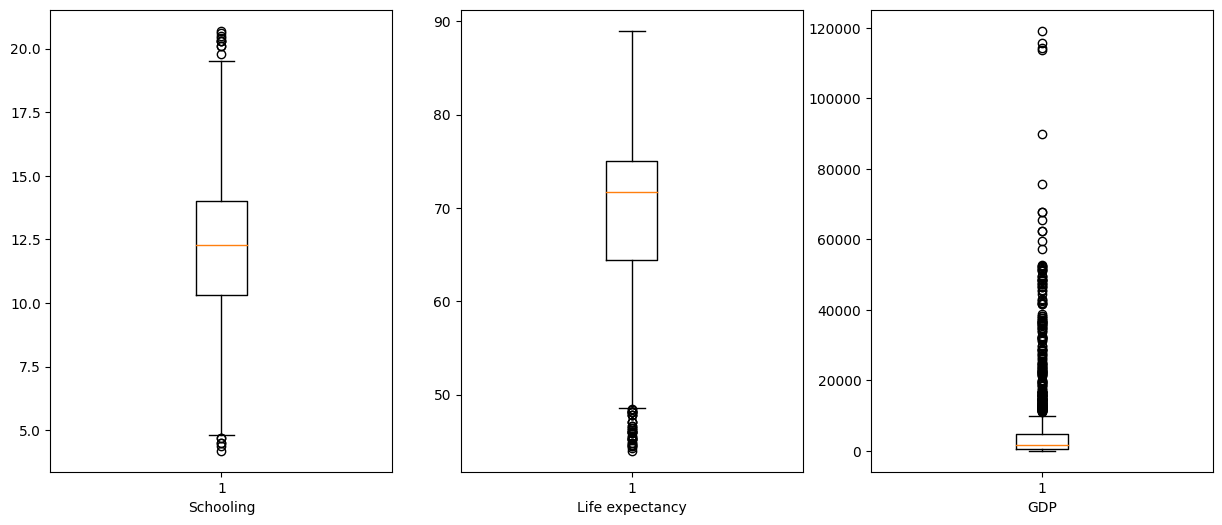

In [37]:
fig, axes = plt.subplots(figsize=(15,6), ncols = 3)

axes1, axes2, axes3 = axes

axes1.boxplot(df["Schooling"])
axes1.set_xlabel("Schooling")

axes2.boxplot(df["Life expectancy"])
axes2.set_xlabel("Life expectancy")

axes3.boxplot(df["GDP"])
axes3.set_xlabel("GDP")

plt.show()

In [38]:
import numpy as np

In [39]:
np.percentile(df["Schooling"], 25)

10.3

In [40]:
np.percentile(df["Schooling"], 75)

14.0

In [41]:
14- 10.3

3.6999999999999993

In [42]:
10.3 - (1.5*3.7)

4.75

In [43]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


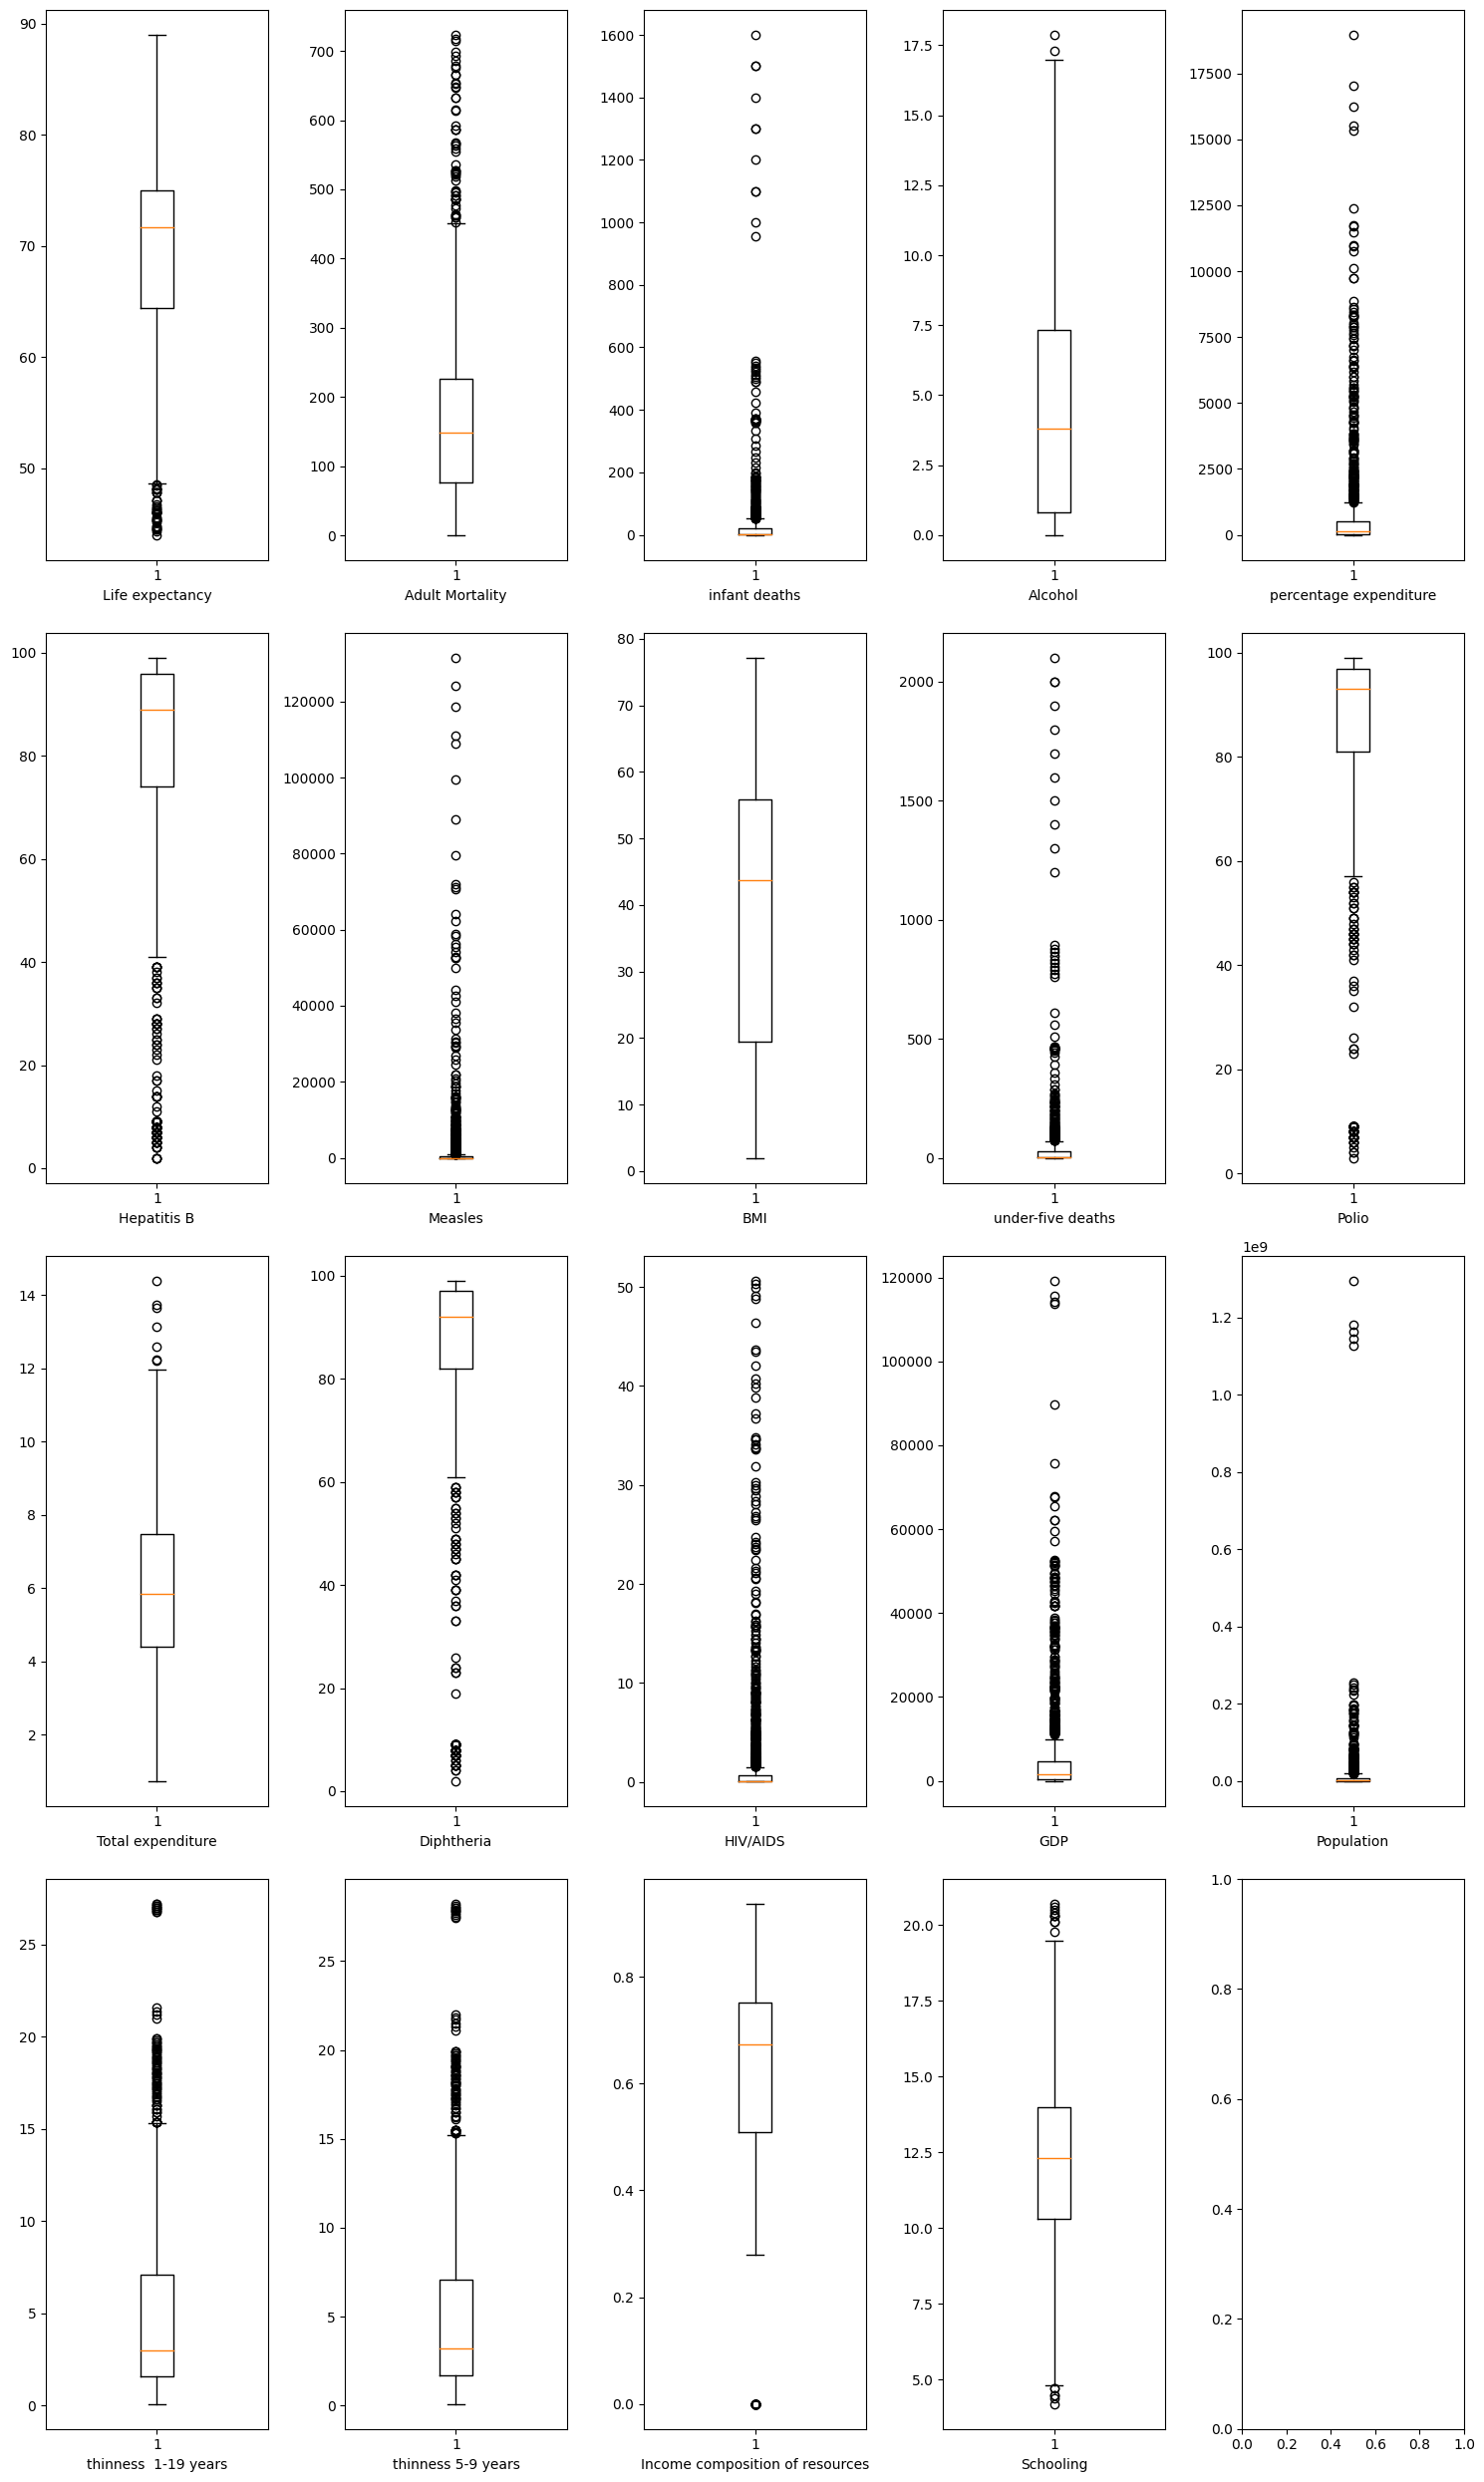

In [44]:
def plot_boxplot(x, xlabel, axes):
    axes.boxplot(x)
    axes.set_xlabel(xlabel)

fig, axes = plt.subplots(figsize=(15, 25), ncols=5, nrows=4, tight_layout=True)

axes = axes.flatten()

columns = df.columns[3:]

for ax, col in zip(axes, columns):
    plot_boxplot(x=df[col], xlabel=col, axes=ax)

In [45]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

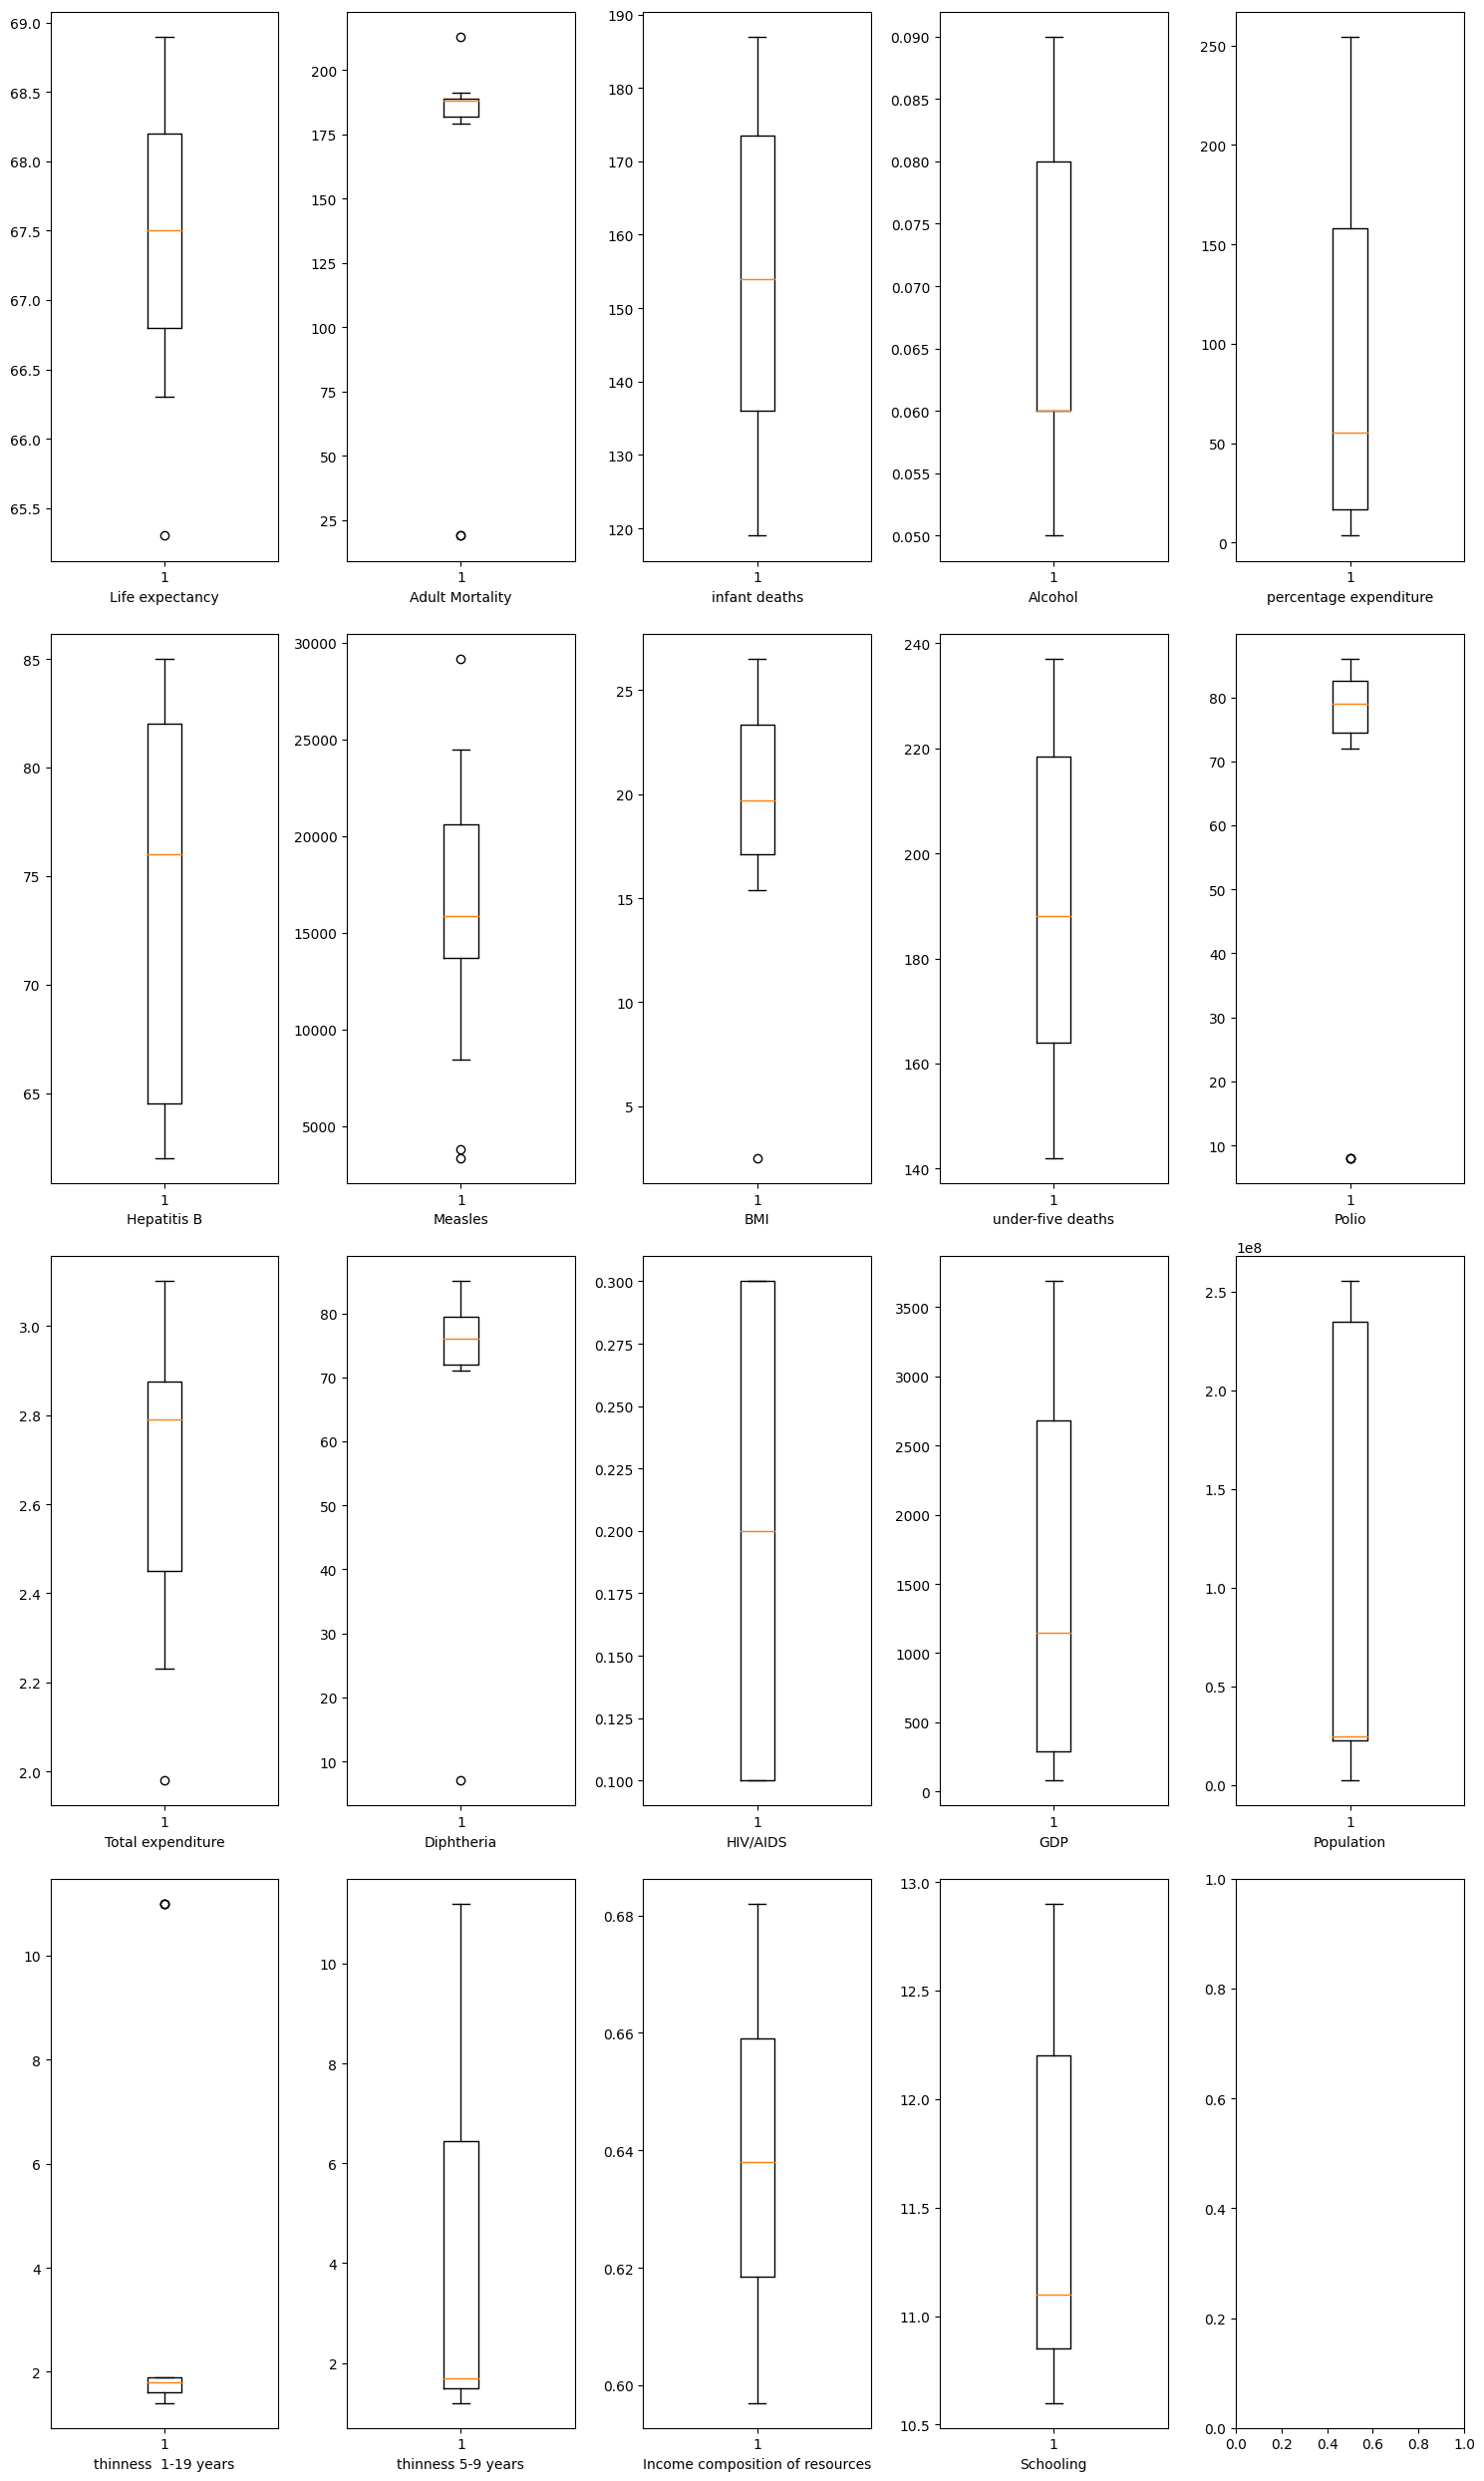

In [46]:
def plot_boxplot(x, xlabel, axes):
    axes.boxplot(x, whis=1)
    axes.set_xlabel(xlabel)

fig, axes = plt.subplots(figsize=(15, 25), ncols=5, nrows=4, tight_layout=True)

axes = axes.flatten()
df_country = df[df["Country"] == "Indonesia"]
columns = df_country.columns[3:]

for ax, col in zip(axes, columns):
    plot_boxplot(x=df_country[col], xlabel=col, axes=ax)

In [47]:
life_ex_75 = np.percentile(df["Life expectancy"], 75)

In [48]:
life_ex_25 = np.percentile(df["Life expectancy"], 25)

In [49]:
life_ex_iqr = life_ex_75 - life_ex_25

In [50]:
life_ex_iqr

10.599999999999994

In [51]:
life_ex__low_outliers = life_ex_25 - (1.5* life_ex_iqr)

In [52]:
low_life_ex_country = df[(df["Life expectancy"] < life_ex__low_outliers)].copy()

In [53]:
low_life_ex_country["Country"].unique()

array(['Angola', 'Botswana', 'Lesotho', 'Malawi', 'Sierra Leone',
       'Swaziland', 'Zimbabwe'], dtype=object)

In [54]:
low_life_ex_country.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,2004.666667,46.264103,477.025641,19.692308,3.709744,83.462559,71.051282,316.076923,23.376923,30.769231,80.282051,6.273590,77.307692,29.410256,1058.187322,3.425099e+06,7.797436,7.792308,0.444769,9.894872
std,3.046424,1.338201,250.637764,18.376406,1.903775,128.911705,28.077851,556.959716,7.688387,29.421136,19.296780,2.405457,22.363214,14.865835,1286.403615,4.960800e+06,2.755711,2.768182,0.063803,1.016689
min,2000.000000,44.000000,6.000000,2.000000,0.010000,0.000000,6.000000,0.000000,2.200000,4.000000,7.000000,1.120000,7.000000,0.600000,22.994490,1.893000e+03,1.200000,1.100000,0.357000,7.700000
25%,2002.500000,45.300000,399.500000,3.000000,1.895000,4.838109,68.000000,1.000000,20.000000,4.000000,75.000000,5.115000,73.000000,22.900000,176.332553,1.779300e+05,7.450000,7.400000,0.397000,9.350000
50%,2004.000000,46.000000,587.000000,24.000000,3.910000,25.216833,83.000000,44.000000,26.700000,39.000000,87.000000,6.350000,84.000000,31.900000,453.351155,1.267638e+06,8.300000,8.300000,0.434000,9.700000
75%,2007.000000,47.450000,659.500000,29.000000,5.425000,81.505052,88.000000,327.000000,27.900000,45.000000,88.000000,7.125000,88.500000,39.300000,1381.315589,2.489987e+06,9.150000,9.200000,0.494000,10.550000
max,2014.000000,48.500000,723.000000,87.000000,7.190000,469.582390,99.000000,2672.000000,32.200000,138.000000,99.000000,13.130000,99.000000,50.600000,4896.583835,1.355847e+07,12.300000,12.200000,0.580000,11.900000


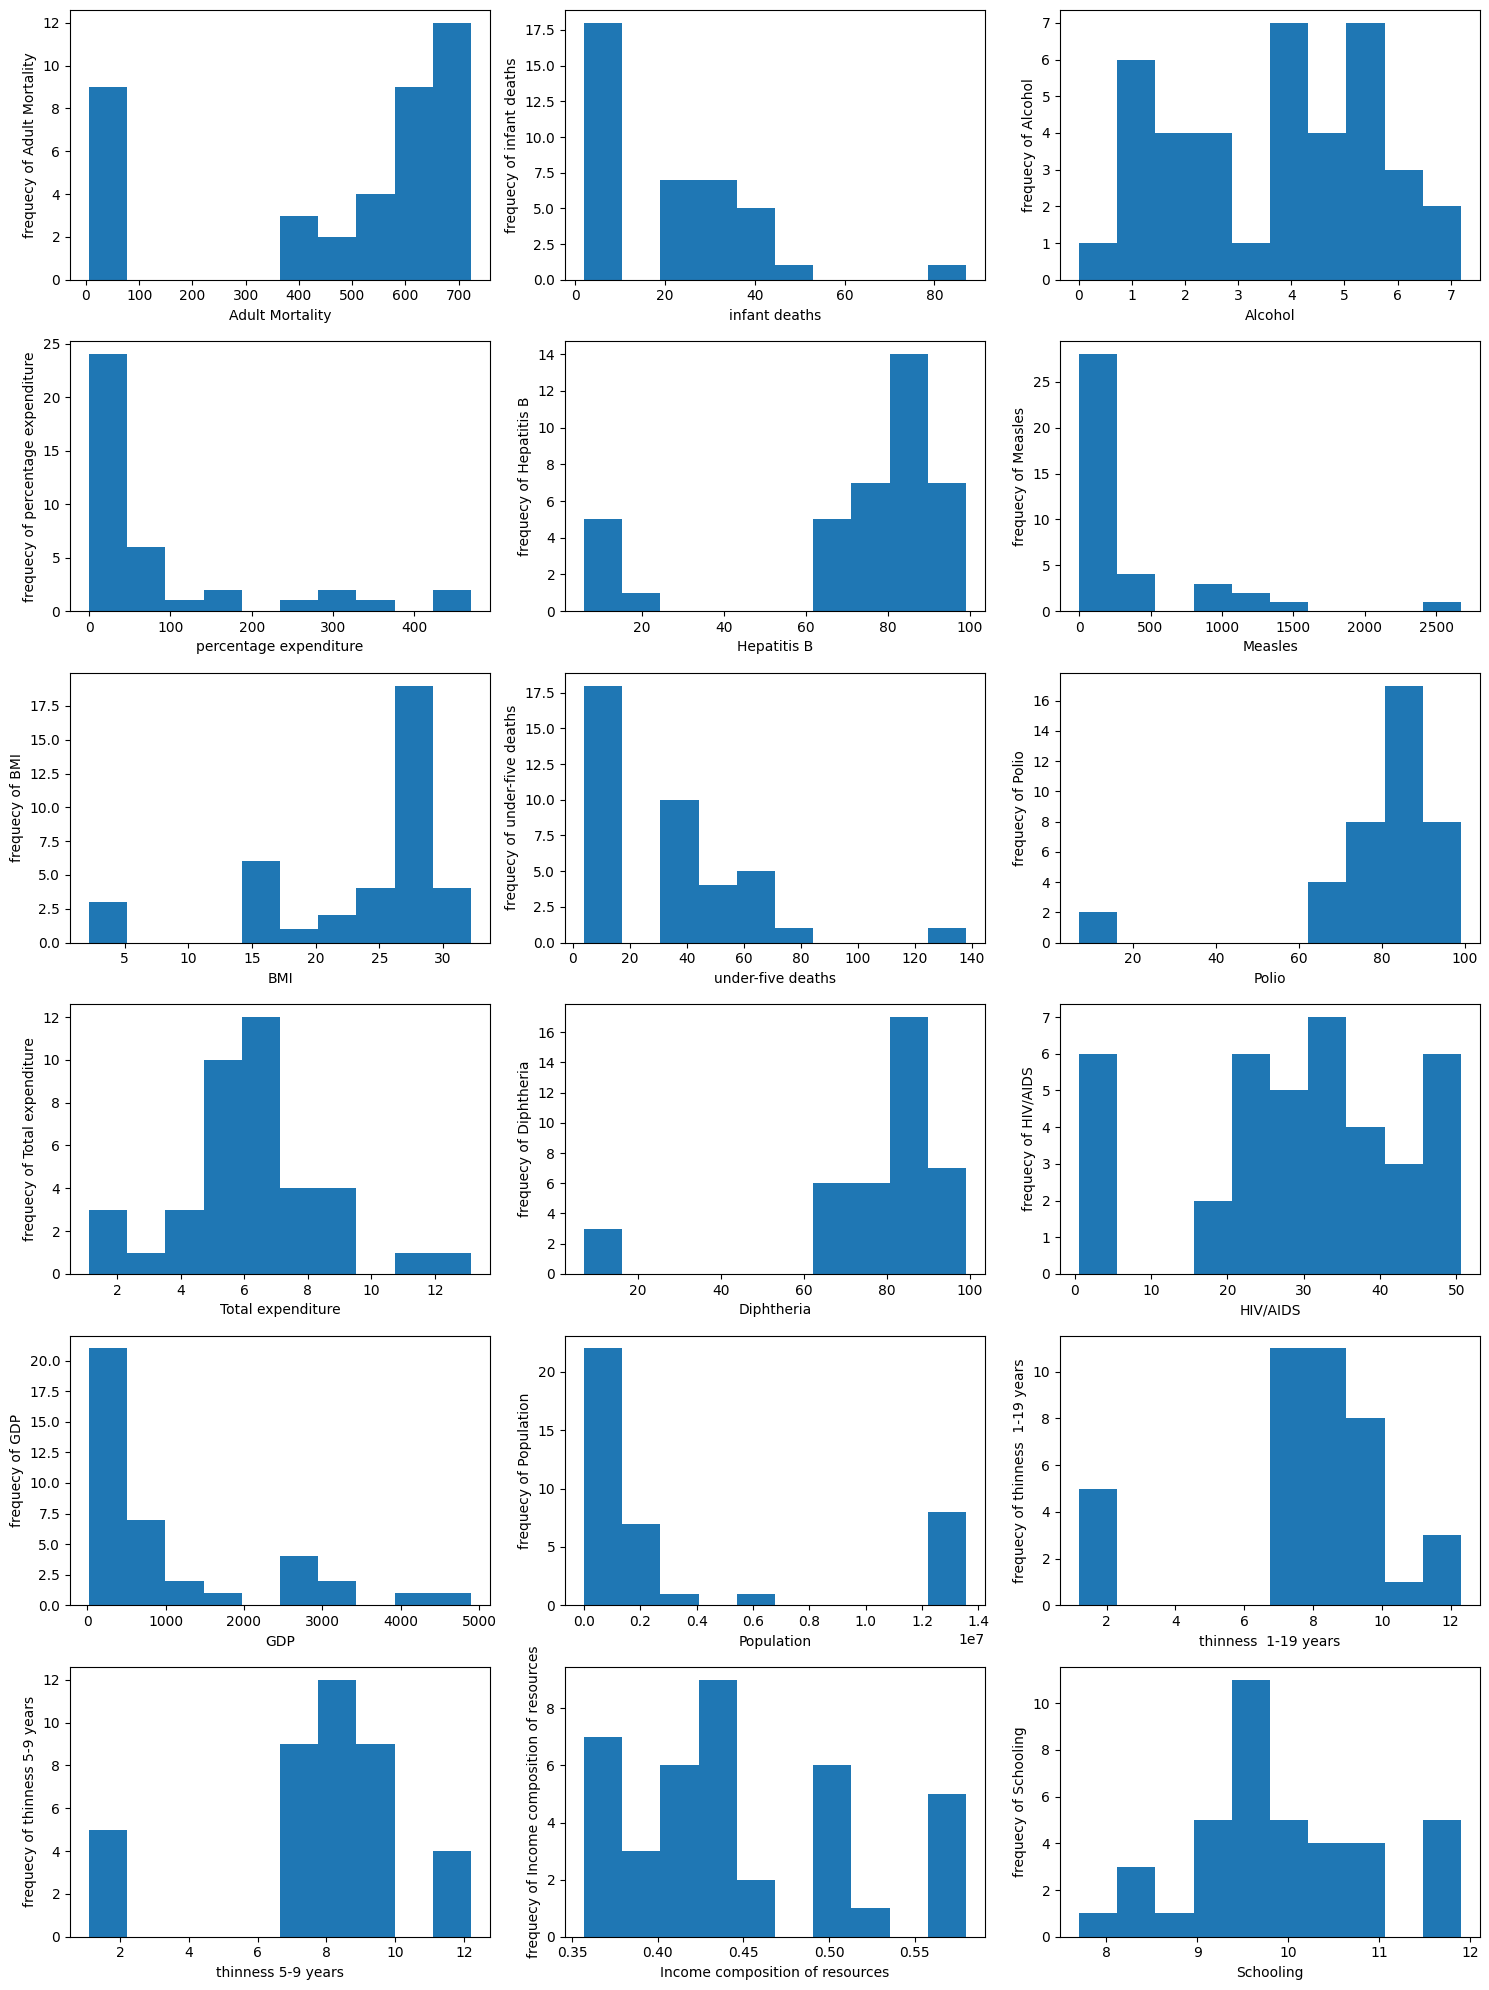

In [55]:
def plot_histogram(x,x_label, axes):
    axes.hist(x)
    axes.set_xlabel(x_label)
    axes.set_ylabel(f"frequecy of {x_label}")
    # axes.vlines(x_label.mean(), 0, 40, label="Mean", color="red")
    # axes.vlines(x_label.median(), 0, 40, label="Median", color="yellow")
    
fig, axes = plt.subplots(figsize=(15,20), tight_layout=True, nrows=6, ncols=3)
axes = axes.flatten()
columns = low_life_ex_country.columns[4:]

for ax, col in zip(axes, columns):
    plot_histogram(x=low_life_ex_country[col], axes=ax, x_label=col)

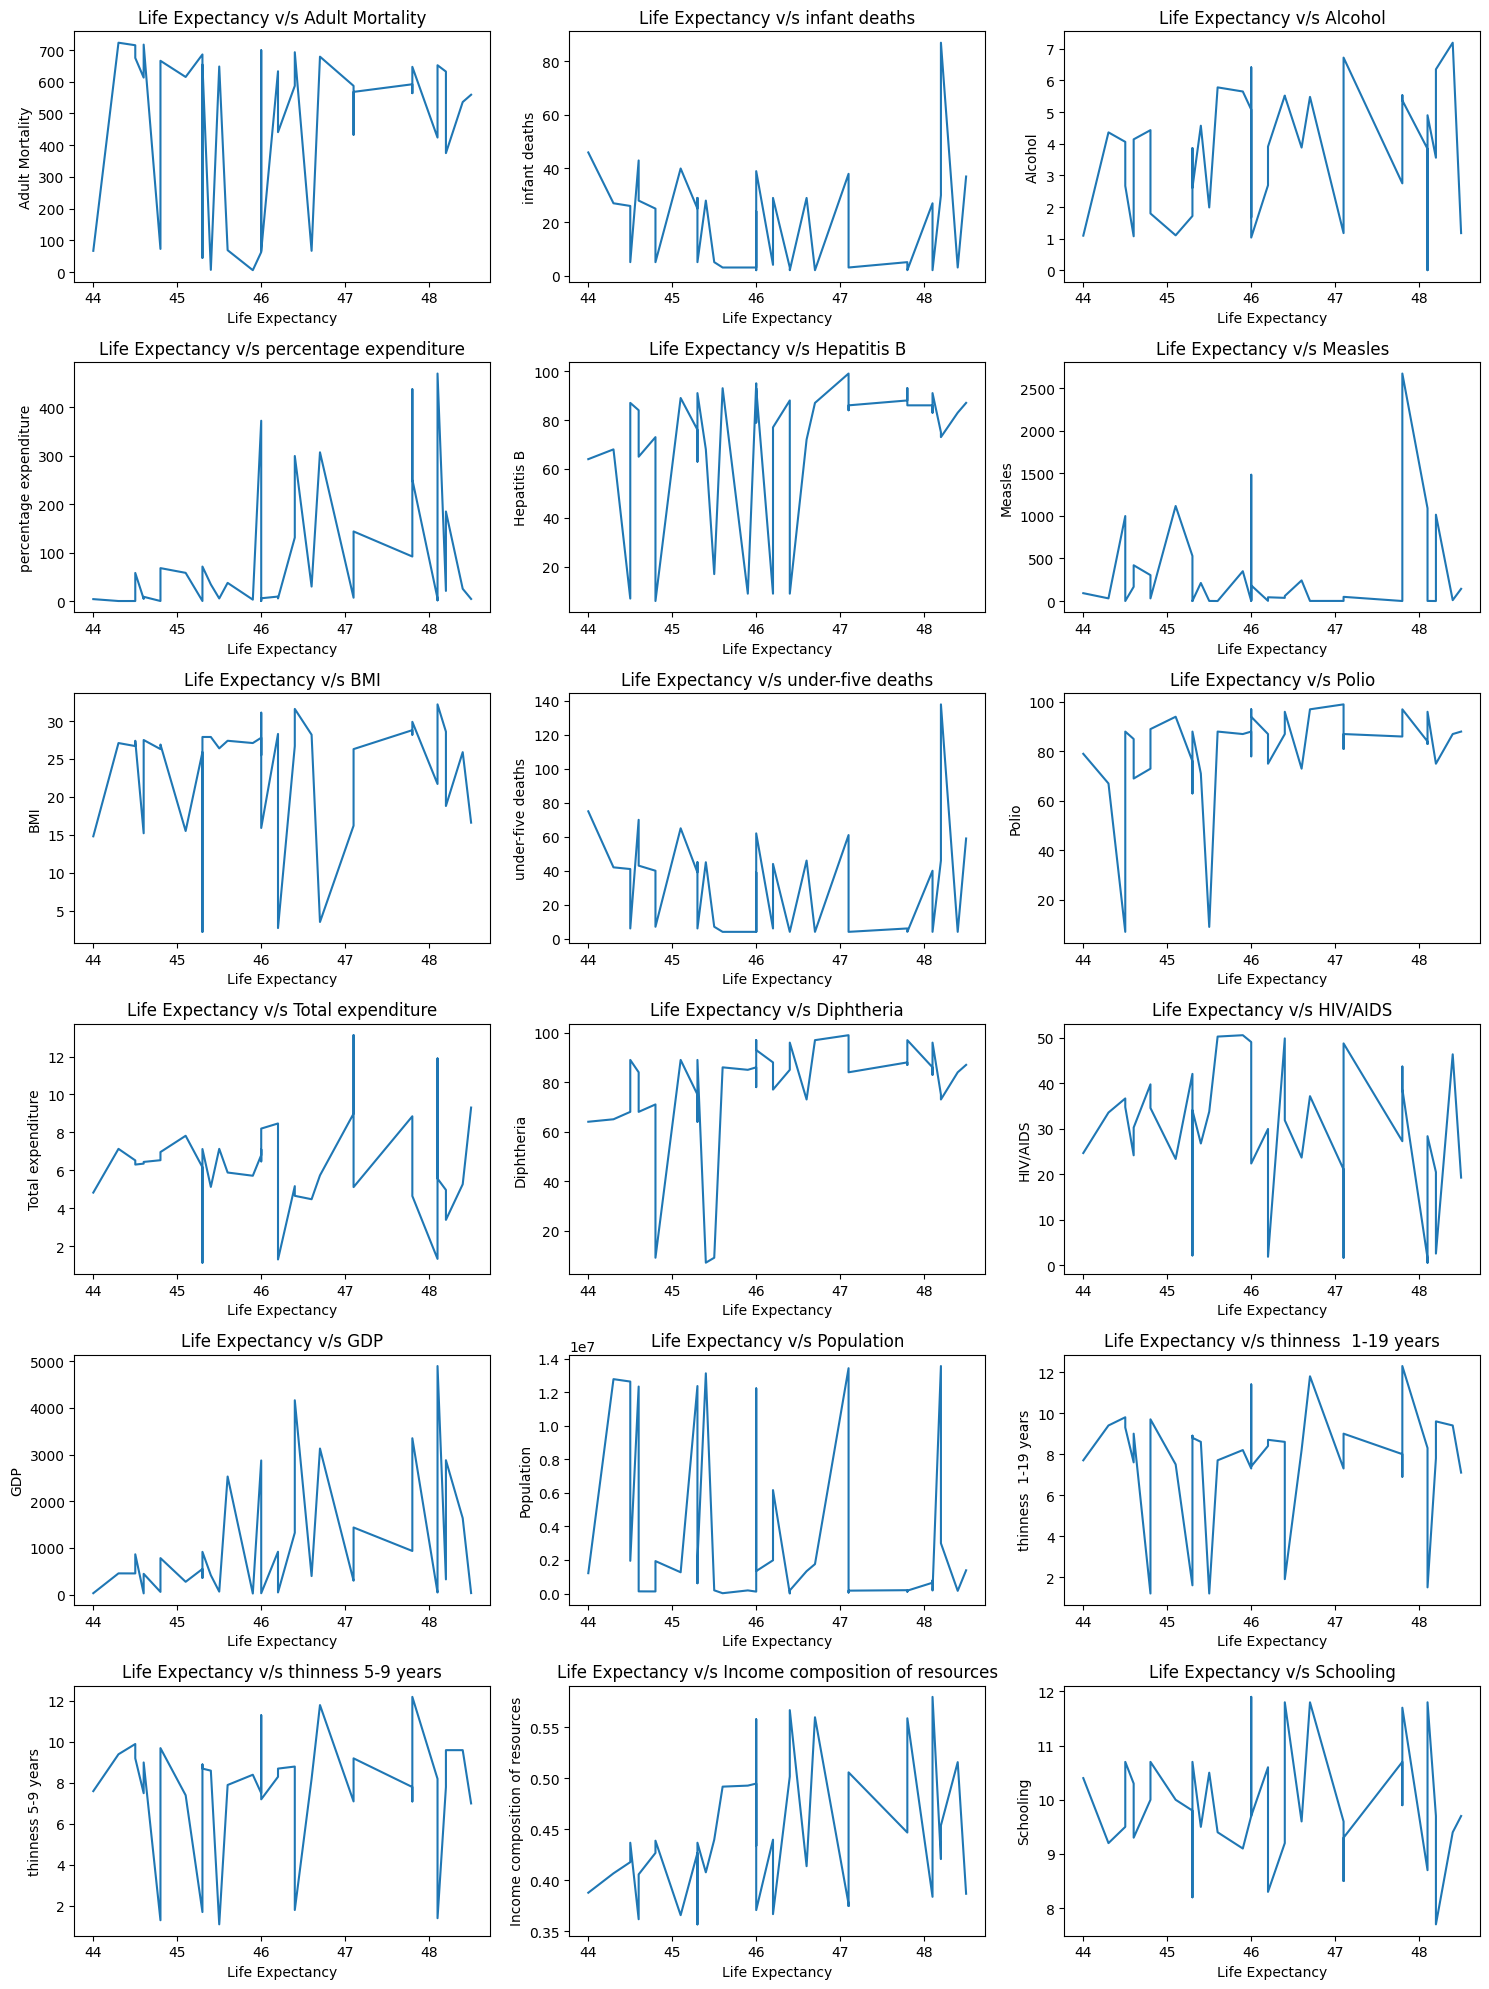

In [56]:
low_life_ex_country.sort_values("Life expectancy", inplace=True)

def plot_linechart(x,y,x_label,y_label,axes):
    axes.plot(x,y)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")

fig, axes = plt.subplots(figsize=(15,20), ncols=3, nrows=6, tight_layout=True)
axes=axes.flatten()
columns=low_life_ex_country.columns[4:]

for ax, col in zip(axes, columns):
    plot_linechart(x=low_life_ex_country["Life expectancy"], y=low_life_ex_country[col], x_label="Life Expectancy", y_label=col, axes=ax)

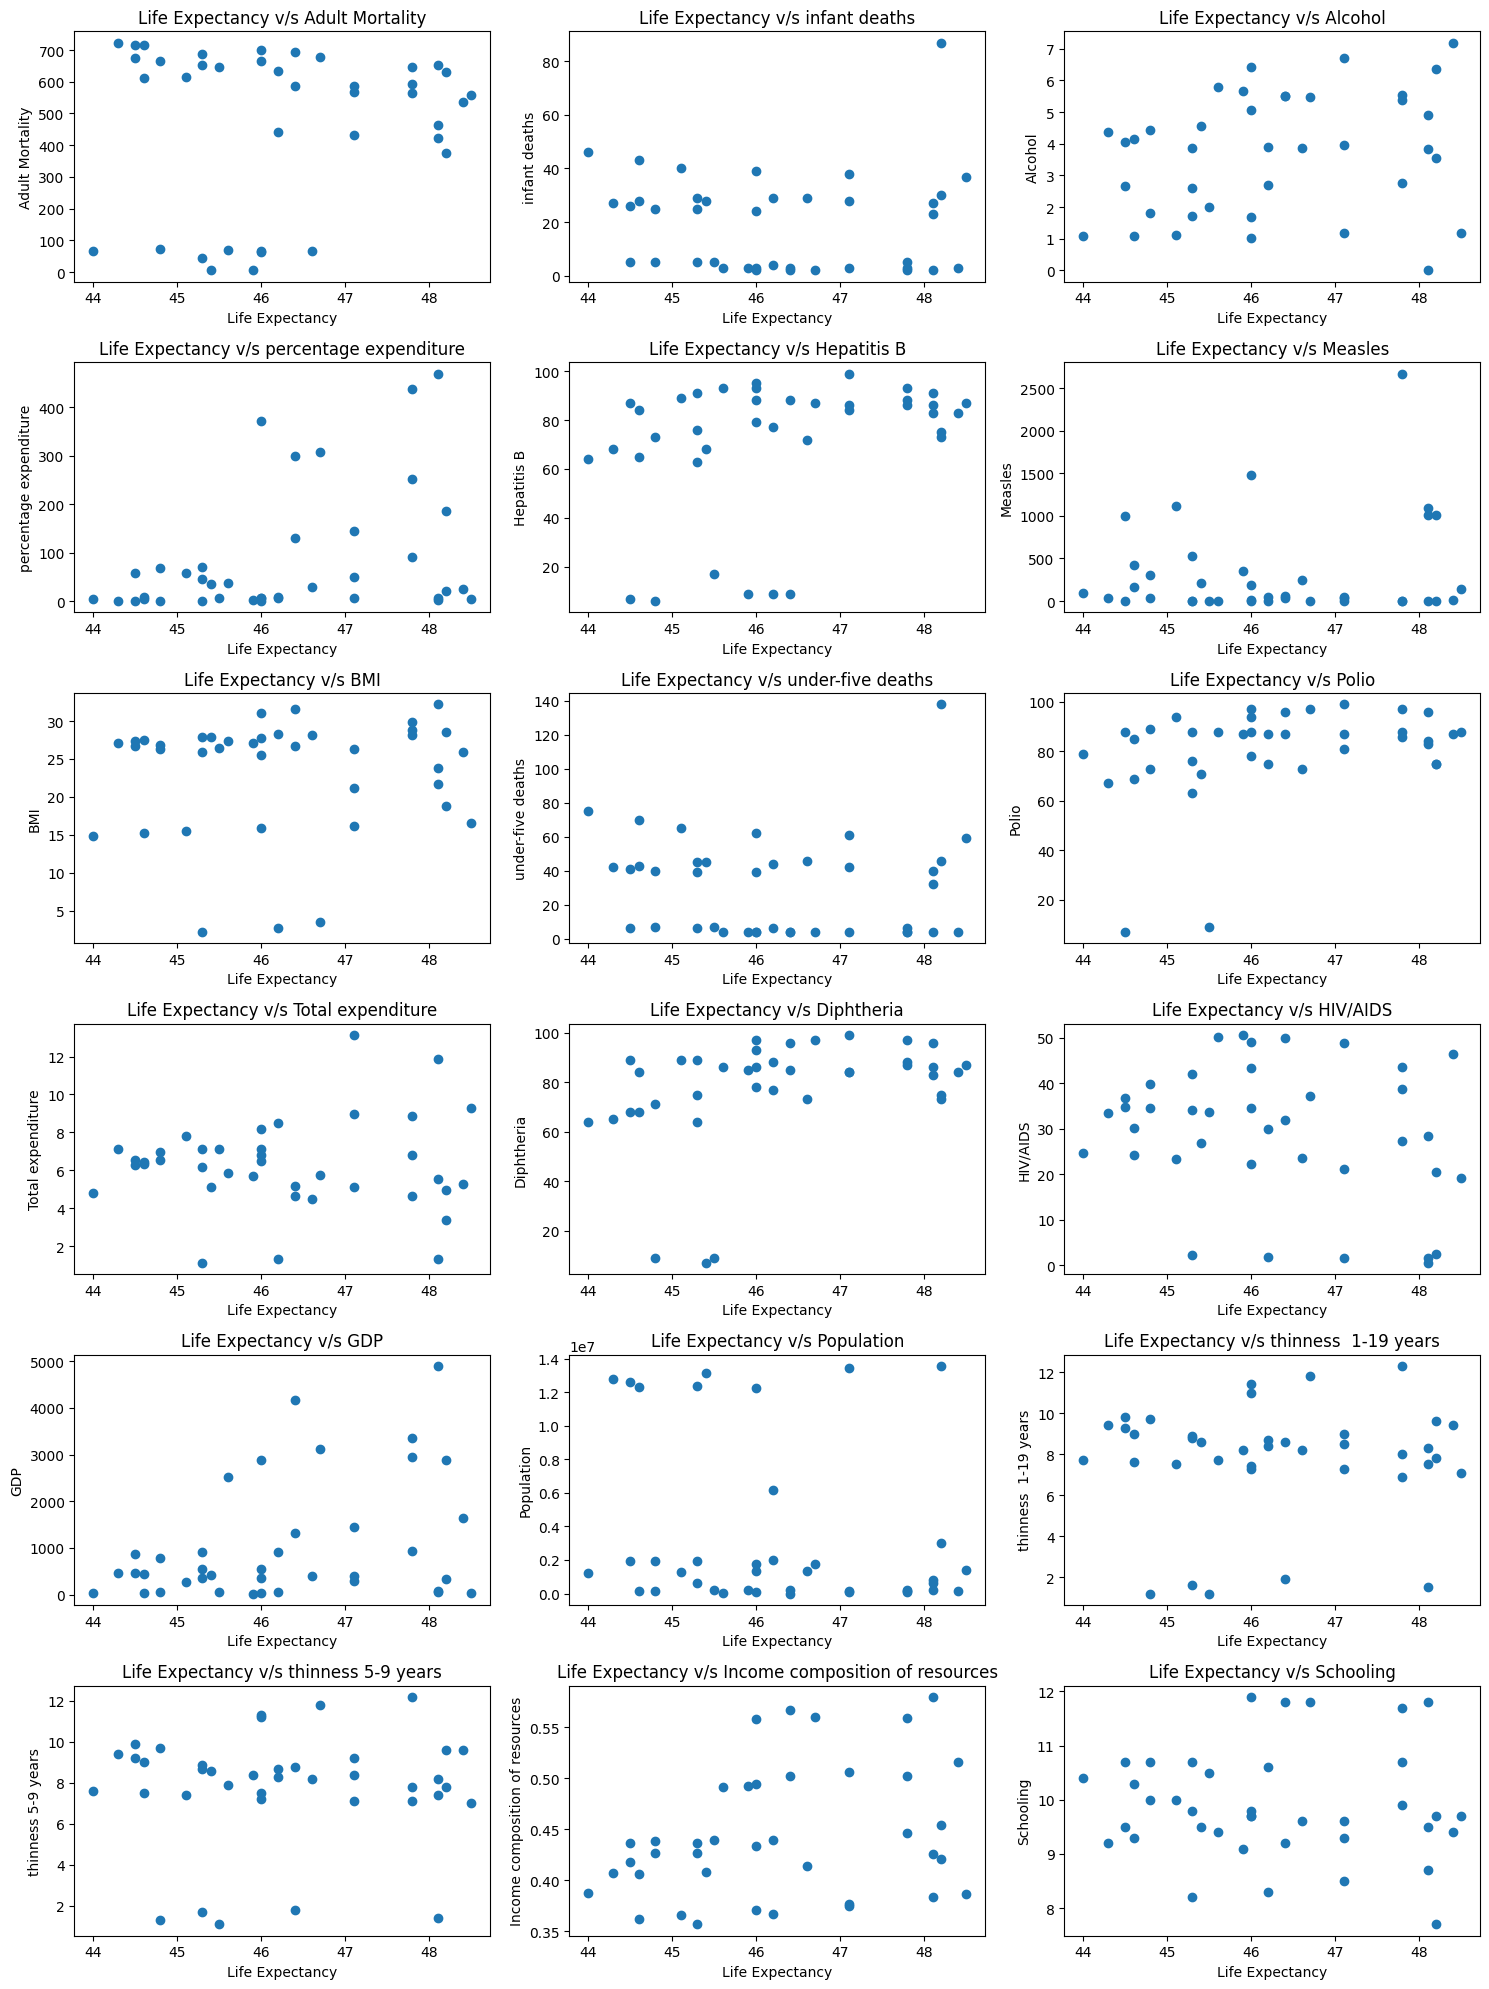

In [57]:
fig, axes = plt.subplots(figsize=(15,20), nrows=6, ncols=3, tight_layout=True)

axes = axes.flatten()
columns = low_life_ex_country.columns[4:]

for ax, col in zip(axes, columns):
    plot_scatter(low_life_ex_country["Life expectancy"], low_life_ex_country[col], x_label="Life Expectancy", y_label=col, axes=ax)

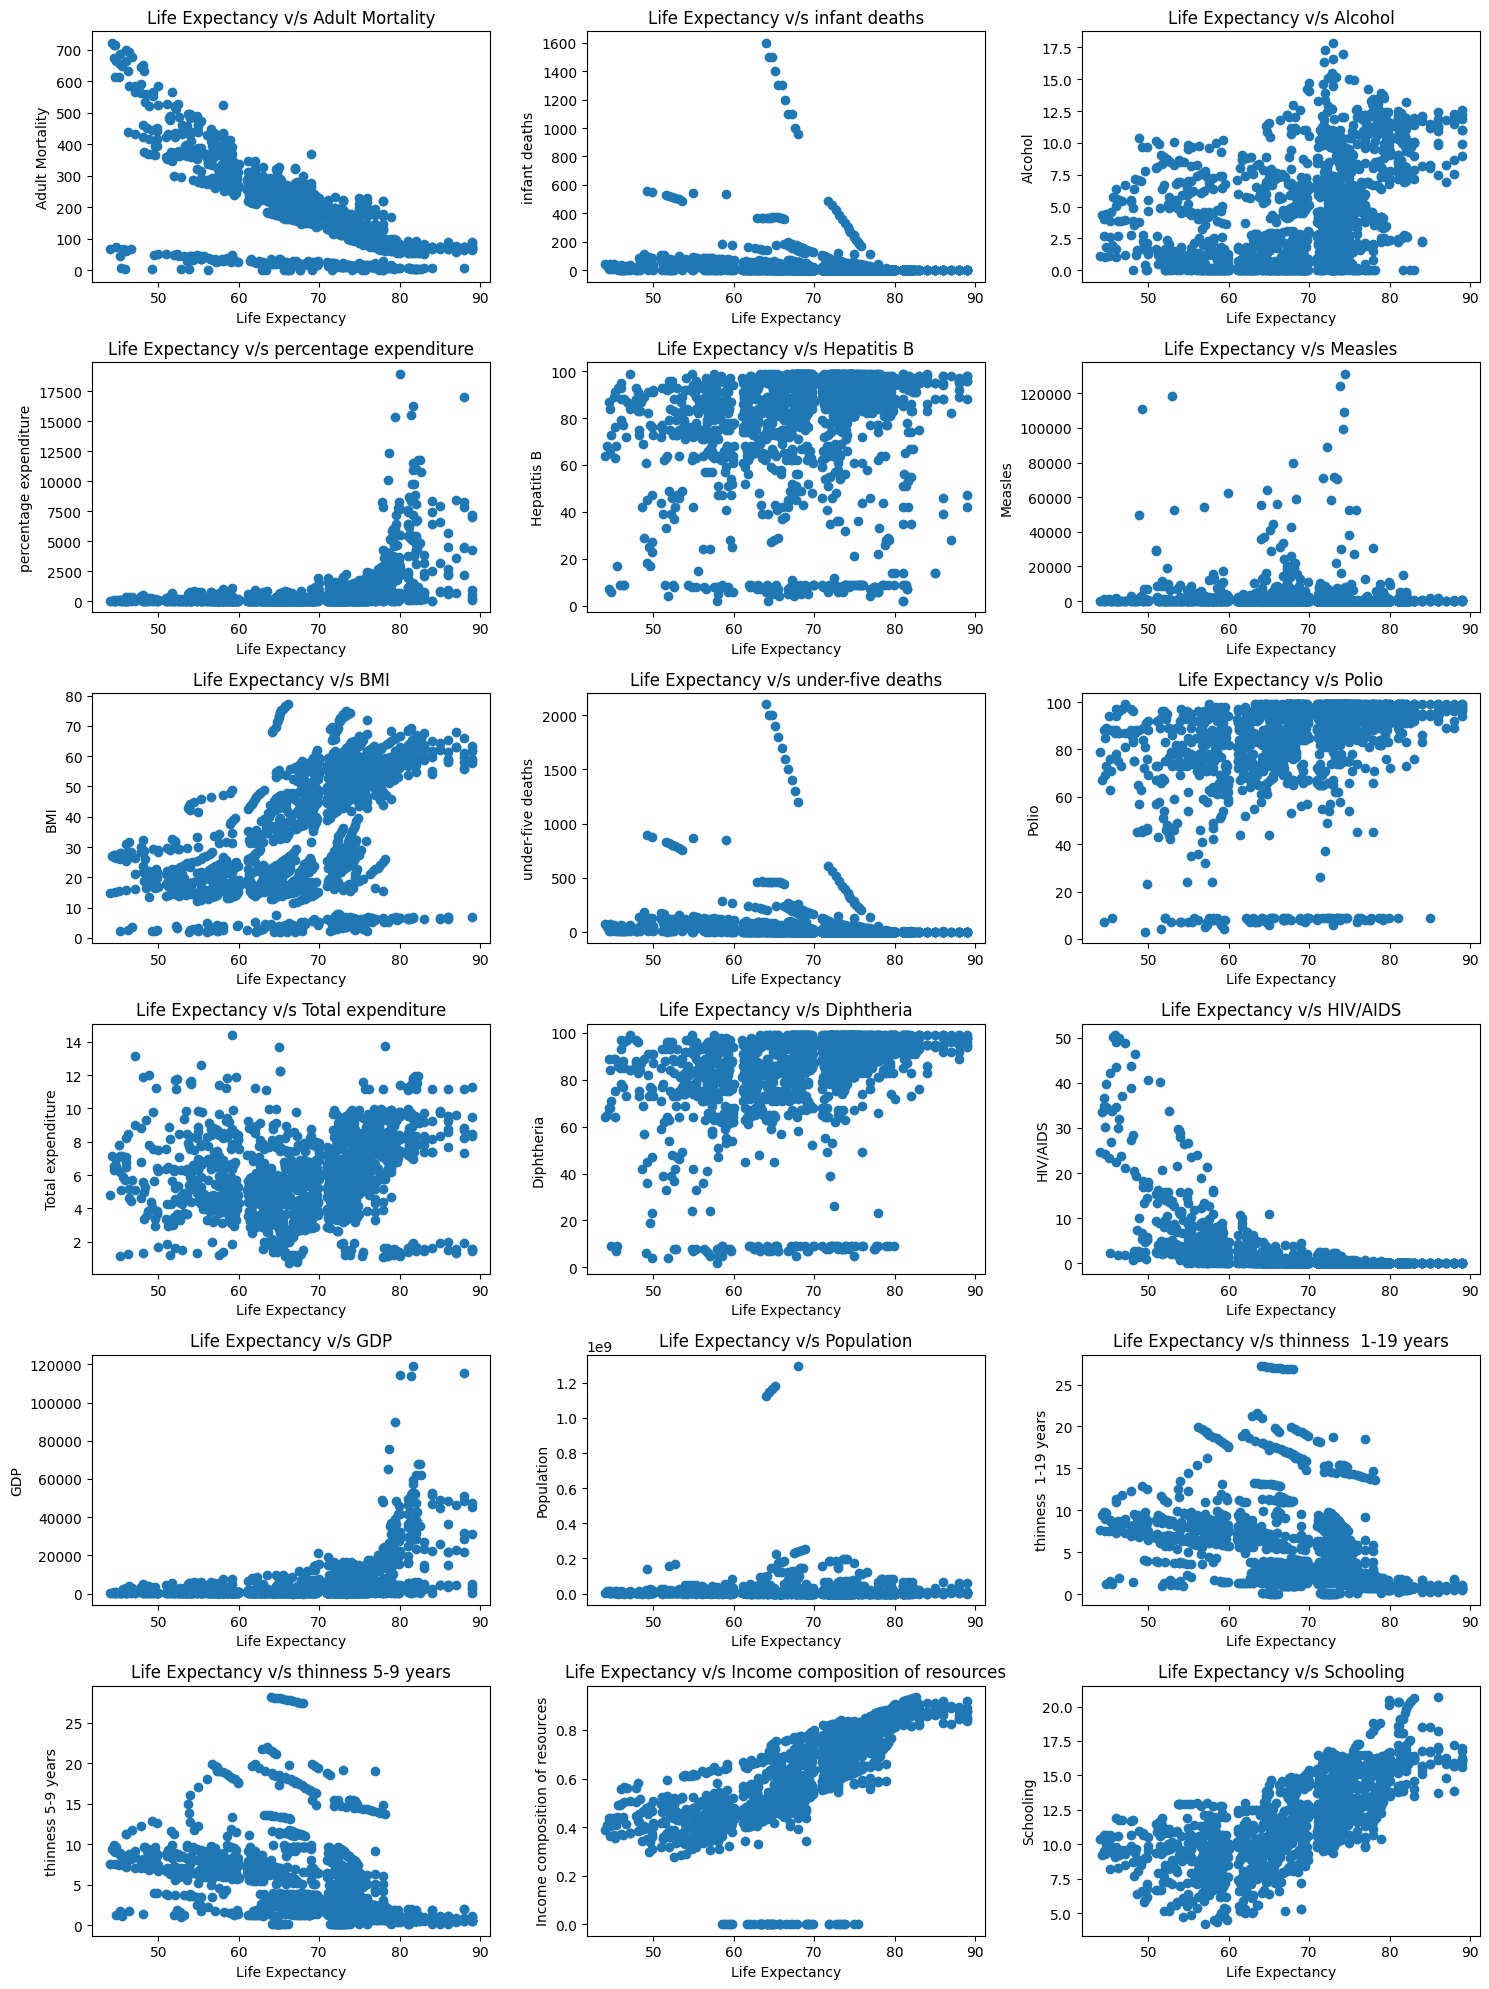

In [58]:
fig, axes = plt.subplots(figsize=(15,20), nrows=6, ncols=3, tight_layout=True)

axes = axes.flatten()
columns = df.columns[4:]

for ax, col in zip(axes, columns):
    plot_scatter(df["Life expectancy"], df[col], x_label="Life Expectancy", y_label=col, axes=ax)

In [59]:
df["Life expectancy"].corr(df["Diphtheria"])

0.34133123426064105

<BarContainer object of 11 artists>

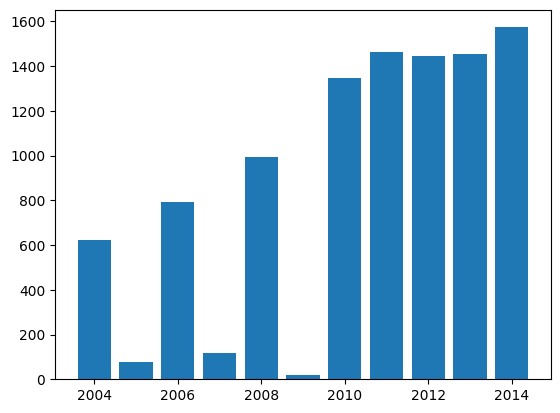

In [60]:
country = df[df["Country"]=="India"]
plt.bar(country["Year"],country["GDP"])

## Heat Map

**Heatmap** is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred.

Heatmap is also defined by the name of the shading matrix. Heatmap is Seaborn can be plotted by using the seaborn.heatmap() function.

`Syntax:` seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, **kwargs)

- **Data :** 2D dataset that can be coerced into an ndarray.
- **vmin, vmax :** Values to anchor the colormap, otherwise they are inferred from the data and other keyword argus. 
- **cmap :** The mapping from data values to color space.
- **center :** The value at which to center the colormap when plotting divergent data.
- **annot :** If True, write the data value in each cell.
- **fmt :** String formatting code to use when adding annotations.
- **linewidths :** Width of the lines that will divide each cell.
- **linecolor :** Color of the lines that will divide each cell.
- **cbar :** Whether to draw a colorbar.irbar.
    


In [61]:
df[df.columns[3:]].corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013
Polio,0.327294,-0.199853,-0.156929,0.240315,0.128626,0.463331,-0.057850,0.186268,-0.171164,1.000000,0.119768,0.609245,-0.107885,0.156809,-0.045387,-0.164070,-0.174489,0.314682,0.350147


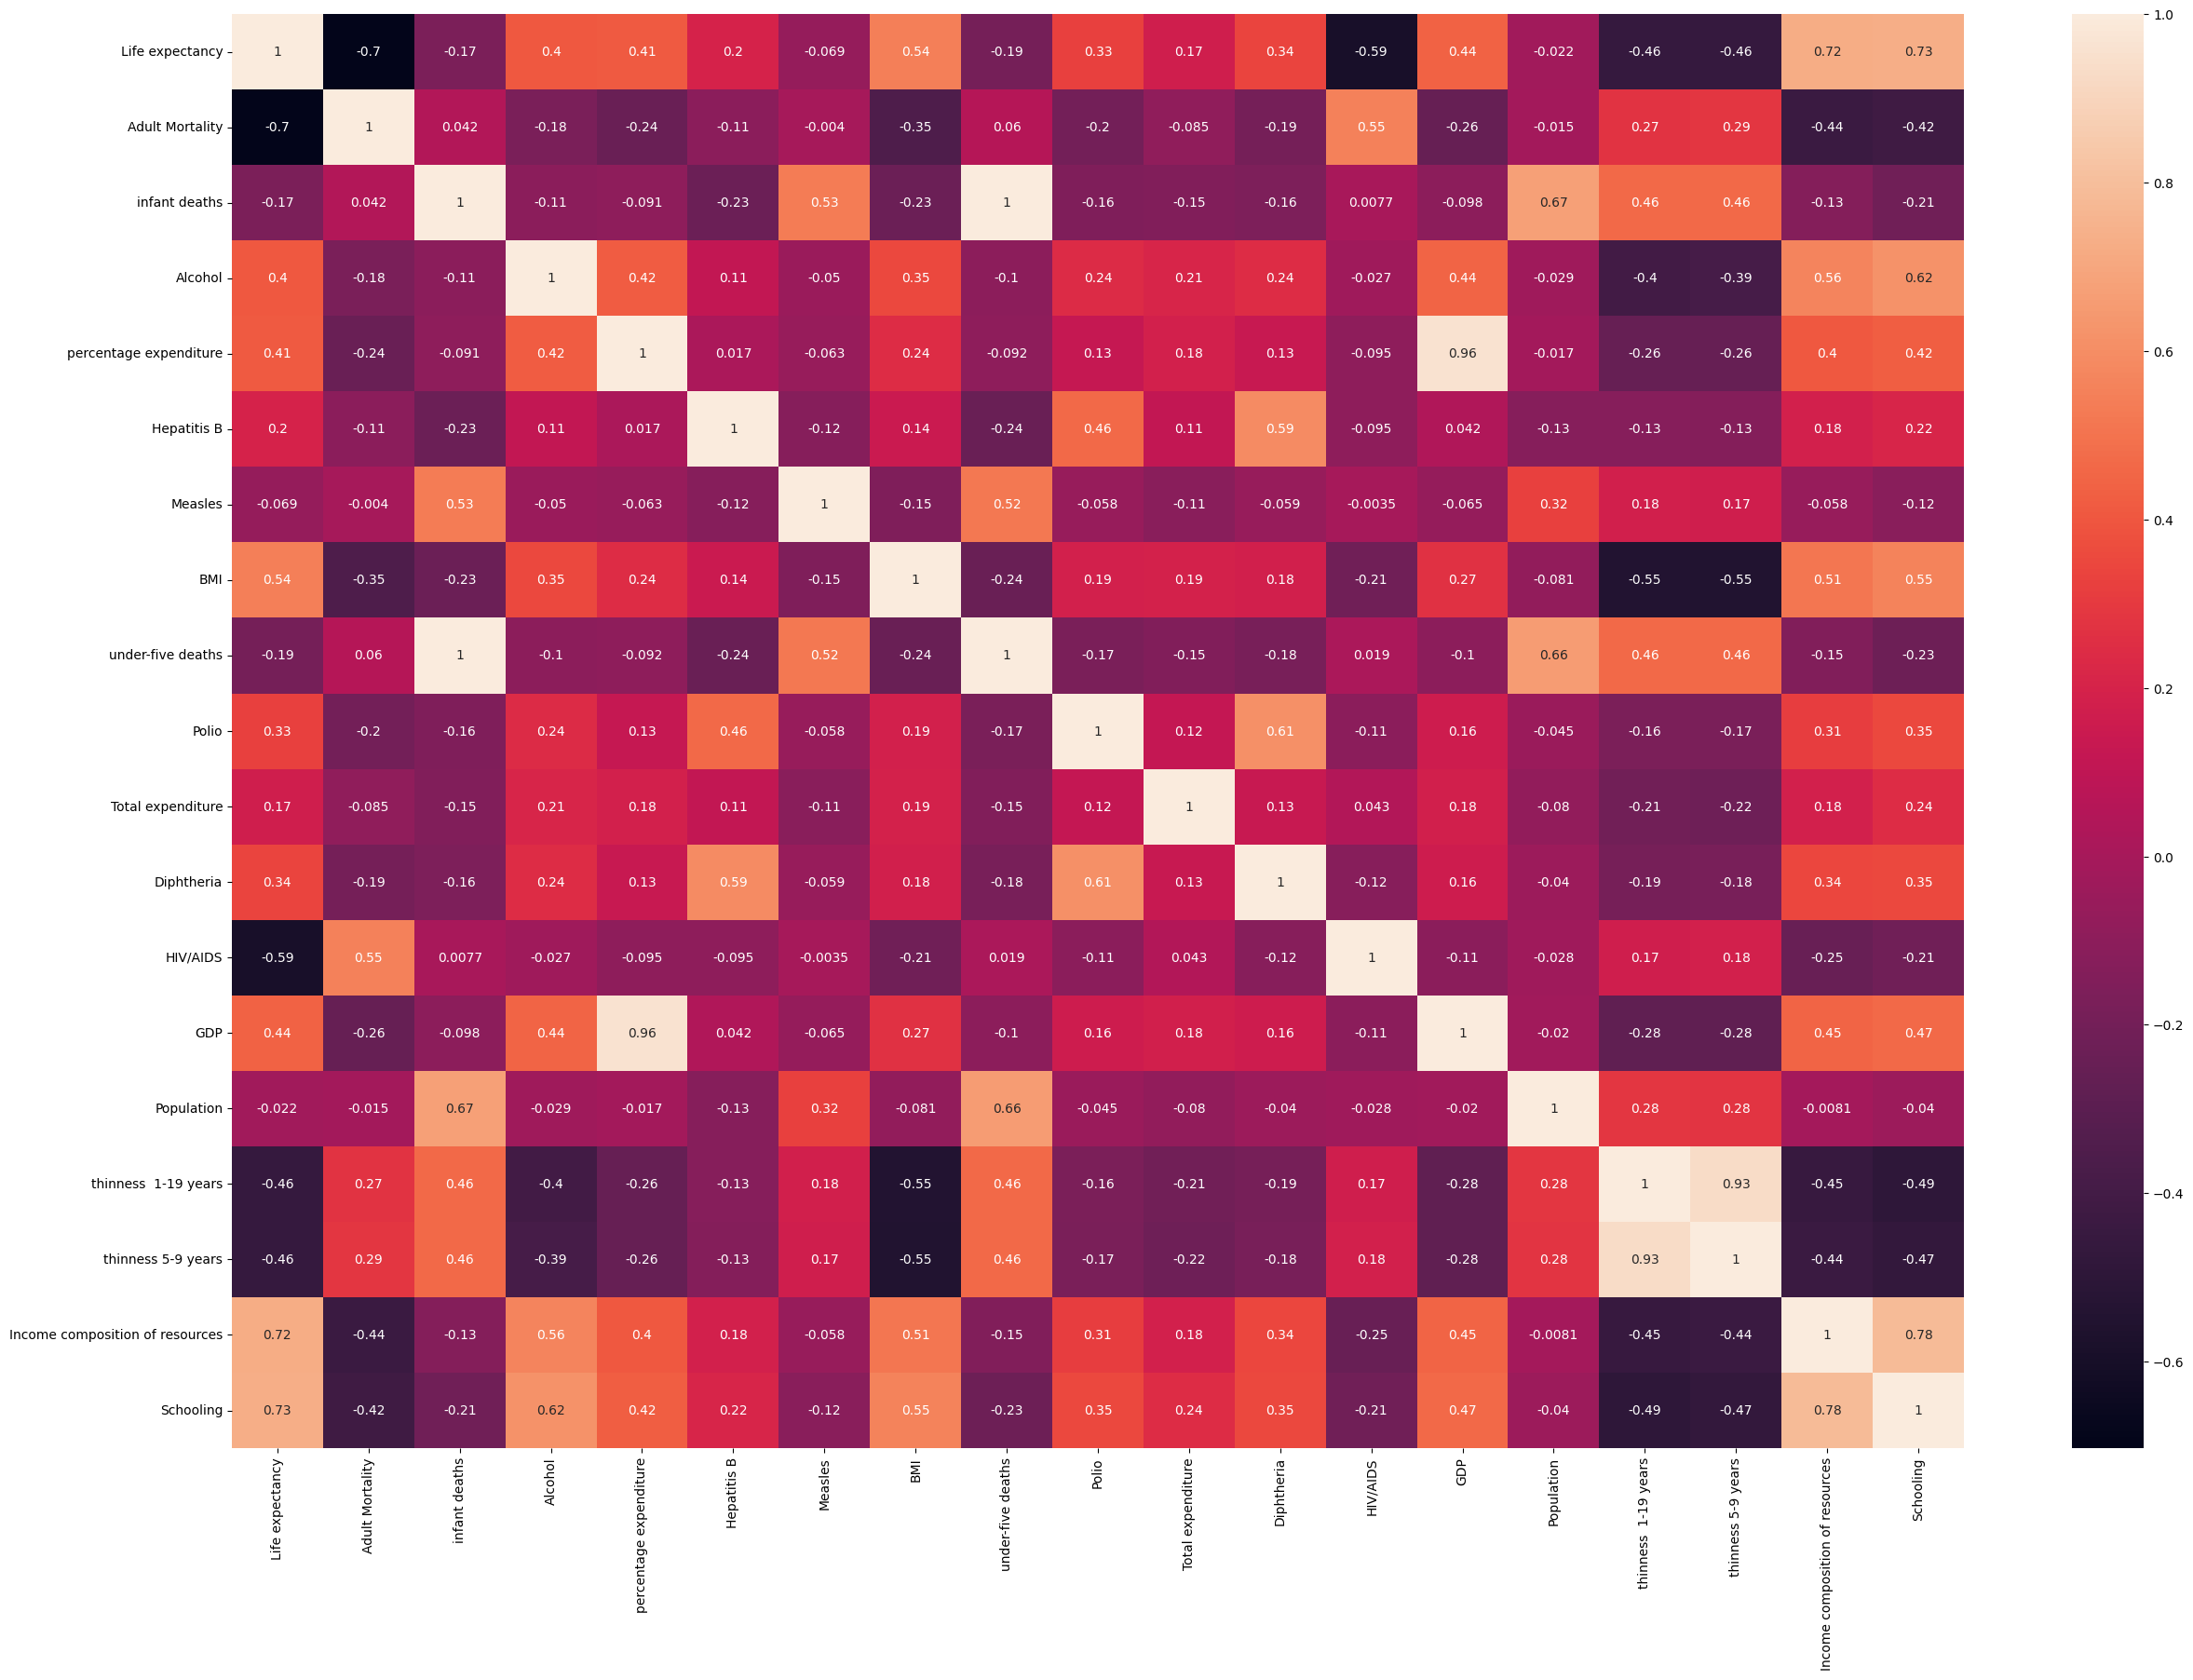

<Figure size 640x480 with 0 Axes>

In [64]:
fig, axes = plt.subplots(figsize=(30,20))

sns.heatmap(df[df.columns[3:]].corr(), ax=axes, annot=True)
plt.show()
plt.savefig('test.png')


|Correlation Coefficient (r)|Description (Rough Guideline)|
|---------|-------|
|+1.0|Perfect Positive association|
|+0.8 to 1.0|Very strong + association|
|+0.6 to 0.8|Strong + association|
|+0.4 to 0.6|Moderate + association|
|+0.2 to 0.4|Weak + association|
|+0.0 to +0.2|Very week + or no association|
|0.0 to -0.2|Very week - or no association|
|-0.2 to -0.4|Weak - association|
|-0.4 to -0.6|Moderate - association|
|-0.6 to -0.8|Strong - association|
|-0.8 to -1.0|Very strong - association|
|-1.0|Perfect - association|


**Adult mortality** have negative strong correlation with life expectancy. value = -0.7 <br>
**Alcohol** have positive moderate correlation with life expectancy. value = 0.4 <br>
**BMI** have positive moderate correlation with life expectancy. value = 0.54 <br>
**HIV/AIDS** have negative moderate correlation with life expectancy. value = -0.59 <br>
**Income composition of resources** have positive strong correlation with life expectancy. value = 0.72 <br>
**Schooling** have positive strong correlation with life expectancy. value = 0.73 <br>
**GDP** have positive moderate correlation with life expectancy. value = 0.44